# Project 2: Predicting House Prices - Model

## Problem Statement

My housing dataset is based off the greater region of Ames, Iowa.

If I were to move to Ames and were in the market to buy a house, how can I best value the properties to ensure I get the most value for my money?  
Which neighbourhoods should I consider that is most worth it as someone new to the area and unaware of the dynamics?

## Executive Summary

This notebook contains all the modelling attempts and model evaluations as well as predictions. It receives its cleaned datasets from a separate notebook for data cleaning and features engineering. This notebook should therefore be read in conjunction with the other notebook **"Predicting House Prices - Data and Features.ipynb"** located in the same folder.

|Model|Algorithm|No. of Features|R<sup>2</sup> Score|MAE|RSS|MSE|RMSE|
|---|---|---|---|---|---|---|---|
|01|ridge|254|0.887|16919.277|256464204312.525|642767429.355|25352.858|
|02|lasso|254|0.855|17561.77|329880933175.126|826769256.078|28753.596|
|03|lasso|77|0.849|18073.36|344676365867.525|863850541.021|29391.334|
|04|ridge|77|0.878|17429.989|278069739174.266|696916639.535|26399.179|
|05|lasso|215|0.920|15667.263|269755028529.607|526865290.097|22953.546|
|06|linear regression|215|0.920|15914.373|270043784716.096|527429267.024|22965.828|
  
  
Building the best model follow the same strategies throughout. We ensure no data leakage between the unseen test set and the training set. The training set is assigned into X features matrix and y target vector. X features matrix is, itself, split into training and testing models for cross-validation evaluation to preliminary find the best model/algorithm to use. Once the best model is found, we will fit our model onto our training data to evaluate its performance as well as generate predictions. From our evaluation of the final model, we can then return to the datasets (and other notebook) and relook at features of interest. The whole process repeats itself again and iterates for as many times as is necessary to build a satisfactory predictive model. The table above tracks the performance of our models against each other.

## Contents:

- [Baseline Model](#Baseline-Model)
- [Features Selection](#Features-Selection)
- [Improve Model](#Improve-Model-with-Selected-Features)
- [Re-engineer for New Model](#Re-engineer-for-New-Model)
- [Re-engineer for New Model, Again!](#Re-engineer-for-New-Model,-Again!)
- [Conclusion](#Conclusion)

#### Data Dictionary

Collapsed below is the Data Dictionary to help you understand the Features.  
It does not include any dummy variables created. You may find the complete data documentation [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).
<br>
<br>
<details><summary>Open to view Data Dictionary</summary>

|Feature|Format|Type|Description|
|---|---|---|---|
|**Id**|*integer*|Nominal|Identifier for each property.|
|**PID**|*integer*|Nominal|Parcel identification number - can be used with city web site for parcel review.|
|**MS SubClass**|*integer*|Nominal|Identifies the type of dwelling involved in the sale. Type is coded, please refer to full data documentation|
|**MS Zoning**|*string*|Nominal|Identifies the general zoning classification of the sale.|
|**Lot Frontage**|*float*|Continuous|Linear feet of street connected to property.|
|**Lot Area**|*integer*|Continuous|Lot size in square feet.|
|**Street**|*string*|Nominal|Type of road access to property.|
|**Alley**|*string*|Nominal|Type of alley access to property.|
|**Lot Shape**|*string*|Ordinal|General shape of property.|
|**Land Contour**|*string*|Nominal|Flatness of the property.|
|**Utilities**|*string*|Ordinal|Type of utilities available.|
|**Lot Config**|*string*|Nominal|Lot configuration.|
|**Land Slope**|*string*|Ordinal|Slope of property.|
|**Neighborhood**|*string*|Nominal|Physical locations within Ames city limits.|
|**Condition 1**|*string*|Nominal|Proximity to various conditions.|
|**Condition 2**|*string*|Nominal|Proximity to various conditions.|
|**Bldg Type**|*string*|Nominal|Type of dwelling.|
|**House Style**|*string*|Nominal|Style of dwelling.|
|**Overall Qual**|*integer*|Ordinal|Rates the overall material and finish of the house.|
|**Overall Cond**|*integer*|Ordinal|Rates the overall condition of the house|
|**Year Built**|*integer*|Discrete|Original construction date|
|**Year Remod/Add**|*integer*|Discrete|Remodel date (same as construction date if no remodeling or additions)|
|**Roof Style**|*string*|Nominal|Type of roof|
|**Roof Matl**|*string*|Nominal|Roof material|
|**Exterior 1**|*string*|Nominal|Exterior covering on house|
|**Exterior 2**|*string*|Nominal|Exterior covering on house|
|**Mas Vnr Type**|*string*|Nominal|Masonry veneer type|
|**Mas Vnr Area**|*float*|Continuous|Masonry veneer area in square feet|
|**Exter Qual**|*string*|Ordinal|Evaluates the quality of the material on the exterior|
|**Exter Cond**|*string*|Ordinal|Evaluates the present condition of the material on the exterior|
|**Foundation**|*string*|Nominal|Type of foundation|
|**Bsmt Qual**|*string*|Ordinal|Evaluates the height of the basement|
|**Bsmt Cond**|*string*|Ordinal|Evaluates the general condition of the basement|
|**Bsmt Exposure**|*string*|Ordinal|Refers to walkout or garden level walls|
|**BsmtFin Type 1**|*string*|Ordinal|Rating of basement finished area|
|**BsmtFin SF 1**|*float*|Continuous|Type 1 finished square feet|
|**BsmtFinType 2**|*string*|Ordinal|Rating of basement finished area (if multiple types)|
|**BsmtFin SF 2**|*float*|Ordinal|Type 2 finished square feet|
|**Bsmt Unf SF**|*float*|Continuous|Unfinished square feet of basement area|
|**Total Bsmt SF**|*float*|Continuous|Total square feet of basement area|
|**Heating**|*string*|Nominal|Type of heating|
|**HeatingQC**|*string*|Ordinal|Heating quality and condition|
|**Central Air**|*string*|Nominal|Central air conditioning|
|**Electrical**|*string*|Ordinal|Electrical system|
|**1st Flr SF**|*integer*|Continuous|First Floor square feet|
|**2nd Flr SF**|*integer*|Continuous|Second floor square feet|
|**Low Qual Fin SF**|*integer*|Continuous|Low quality finished square feet (all floors)|
|**Gr Liv Area**|*integer*|Continuous|Above grade (ground) living area square feet|
|**Bsmt Full Bath**|*float*|Discrete|Basement full bathrooms|
|**Bsmt Half Bath**|*float*|Discrete|Basement half bathrooms|
|**Full Bath**|*integer*|Discrete|Full bathrooms above grade|
|**Half Bath**|*integer*|Discrete|Half baths above grade|
|**Bedroom AbvGr**|*integer*|Discrete|Bedrooms above grade (does NOT include basement bedrooms)|
|**Kitchen AbvGr**|*integer*|Discrete|Kitchens above grade|
|**KitchenQual**|*string*|Ordinal|Kitchen quality|
|**TotRmsAbvGrd**|*integer*|Discrete|Total rooms above grade (does not include bathrooms)|
|**Functional**|*string*|Ordinal|Home functionality (Assume typical unless deductions are warranted)|
|**Fireplaces**|*integer*|Discrete|Number of fireplaces|
|**FireplaceQu**|*string*|Ordinal|Fireplace quality|
|**Garage Type**|*string*|Nominal|Garage location|
|**Garage Yr Blt**|*float*|Discrete|Year garage was built|
|**Garage Finish**|*string*|Ordinal|Interior finish of the garage|
|**Garage Cars**|*float*|Discrete|Size of garage in car capacity|
|**Garage Area**|*float*|Continuous|Size of garage in square feet|
|**Garage Qual**|*string*|Ordinal|Garage quality|
|**Garage Cond**|*string*|Ordinal|Garage condition|
|**Paved Drive**|*string*|Ordinal|Paved driveway|
|**Wood Deck SF**|*integer*|Continuous|Wood deck area in square feet|
|**Open Porch SF**|*integer*|Continuous|Open porch area in square feet|
|**Enclosed Porch**|*integer*|Continuous|Enclosed porch area in square feet|
|**3-Ssn Porch**|*integer*|Continuous|Three season porch area in square feet|
|**Screen Porch**|*integer*|Continuous|Screen porch area in square feet|
|**Pool Area**|*integer*|Continuous|Pool area in square feet|
|**Pool QC**|*string*|Ordinal|Pool quality|
|**Fence**|*string*|Ordinal|Fence quality|
|**Misc Feature**|*string*|Nominal|Miscellaneous feature not covered in other categories|
|**Misc Val**|*integer*|Continuous|Dollar value of miscellaneous feature|
|**Mo Sold**|*integer*|Discrete|Month sold (MM)|
|**Yr Sold**|*integer*|Discrete|Year sold (YYYY)|
|**Sale Type**|*string*|Nominal|Type of sale|
|**SalePrice**|*integer*|Continuous|Sale price (target vector)|
</details>

#### Python Libraries

In [1]:
import numpy as np
import pandas as pd
import patsy

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Baseline Model

[Back to Top!](#Executive-Summary)

In [2]:
# import cleaned dataframes

In [3]:
df_test_ig_dumm = pd.read_csv("../datasets/df_test_ig_dumm.csv")
df_test_ig_dumm.shape

(879, 254)

In [4]:
df_test_ig_dumm.head(3)

,Id,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,...,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Utilities_NoSeWa,Utilities_NoSewr,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA
0,2658,902301120,190,9142,6,8,1910,1950,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
1,2718,905108090,90,9662,5,4,1977,1977,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
2,2414,528218130,60,17104,7,5,2006,2006,554.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [5]:
df_train_ig_dumm_drp = pd.read_csv("../datasets/df_train_ig_dumm_drp.csv")
df_train_ig_dumm_drp.shape

(1596, 255)

In [6]:
df_train_ig_dumm_drp.head(3)

,Id,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,...,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Utilities_NoSeWa,Utilities_NoSewr,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA
0,544,531379050,60,11492,7,5,1996,1997,637.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1,153,535304180,20,7922,5,7,1953,2007,731.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2,318,916386060,60,9802,5,5,2006,2007,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1


#### Prepare Features Matrix and Target Vector

In [7]:
# set X and y for training set
features = [feat for feat in df_train_ig_dumm_drp._get_numeric_data().columns if feat != "SalePrice"] # exclude target
X = df_train_ig_dumm_drp[features] # create features matrix
y = df_train_ig_dumm_drp["SalePrice"] # create target vector

In [8]:
print(X.shape)
print(y.shape)

(1596, 254)
(1596,)


In [9]:
#train-test split on training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
# scale
ss = StandardScaler()

# fit
ss.fit(X_train)

# transform
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)
X_unseen_test_ss = ss.transform(df_test_ig_dumm) # create features matrix for unseen data

#### Evaluate Algorithms

In [11]:
# instantiate models
ridge = RidgeCV(alphas=np.logspace(0,5,200))
lasso = LassoCV(n_alphas=200)
enet = ElasticNetCV(l1_ratio=np.linspace(0.001,1,50), n_alphas=200)

In [12]:
%%time
# evaluate score of ridge algo
ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv=5)
print("Ridge algorithm has a R^2 score of", np.mean(ridge_scores))

Ridge algorithm has a R^2 score of 0.8239393795696376
Wall time: 3.24 s


In [13]:
%%time
# evaluate score of lasso algo
lasso_scores = cross_val_score(lasso, X_train_ss, y_train, cv=5)
print("Lasso algorithm has a R^2 score of", np.mean(lasso_scores))

C:\Users\yewto\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 626064998.2451172, tolerance: 495156053.0707117
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\yewto\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 703335842.9668274, tolerance: 495156053.0707117
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\yewto\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 598582649.28656, tolerance: 505120053.56492424
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\yewto\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: Con

Lasso algorithm has a R^2 score of 0.7763552200925024
Wall time: 6.5 s


In [14]:
%%time
# evaluate score of enet algo
enet_scores = cross_val_score(enet, X_train_ss, y_train, cv=5)
print("ElasticNet algorithm has a R^2 score of", np.mean(enet_scores))

C:\Users\yewto\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 626064998.2451172, tolerance: 495156053.0707117
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\yewto\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 703335842.9668274, tolerance: 495156053.0707117
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\yewto\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 598582649.28656, tolerance: 505120053.56492424
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\yewto\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: Con

ElasticNet algorithm has a R^2 score of 0.8133794790933987
Wall time: 1min 36s


In [15]:
# consider implications of ConvergenceWarning
# from research, warning may be gotte rid of by increasing number of iterations or tolerance (tol parameter)
# this warning can be understood as an overfit of model to training data
# which is a root problem that cannot be resolved by simply surpressing the warning
# we can either simplify features matrix for lasso or to abandon lasso algorithm

#### Build Ridge Model

In [16]:
# from above, since ridge algo performed the best with an R^2 score of 0.823
# we will build our first model using the ridge regression algo
ridge.fit(X_train_ss, y_train);

In [17]:
ridge.score(X_train_ss, y_train)
# notice ridge score is better than above CV score
# this is because this score is based on training data to training target that the ridge model is fitted on

0.9039408882540729

In [18]:
ridge.score(X_test_ss, y_test)
# not a big drop when applying model to test set
# R^2 score remains fairly stable
# therefore model is generalising well on unseen data

0.8877128095589056

In [19]:
predictions = ridge.predict(X_test_ss) # predict on test set
residuals = y_test - predictions # eval residuals between predictions and known target vector

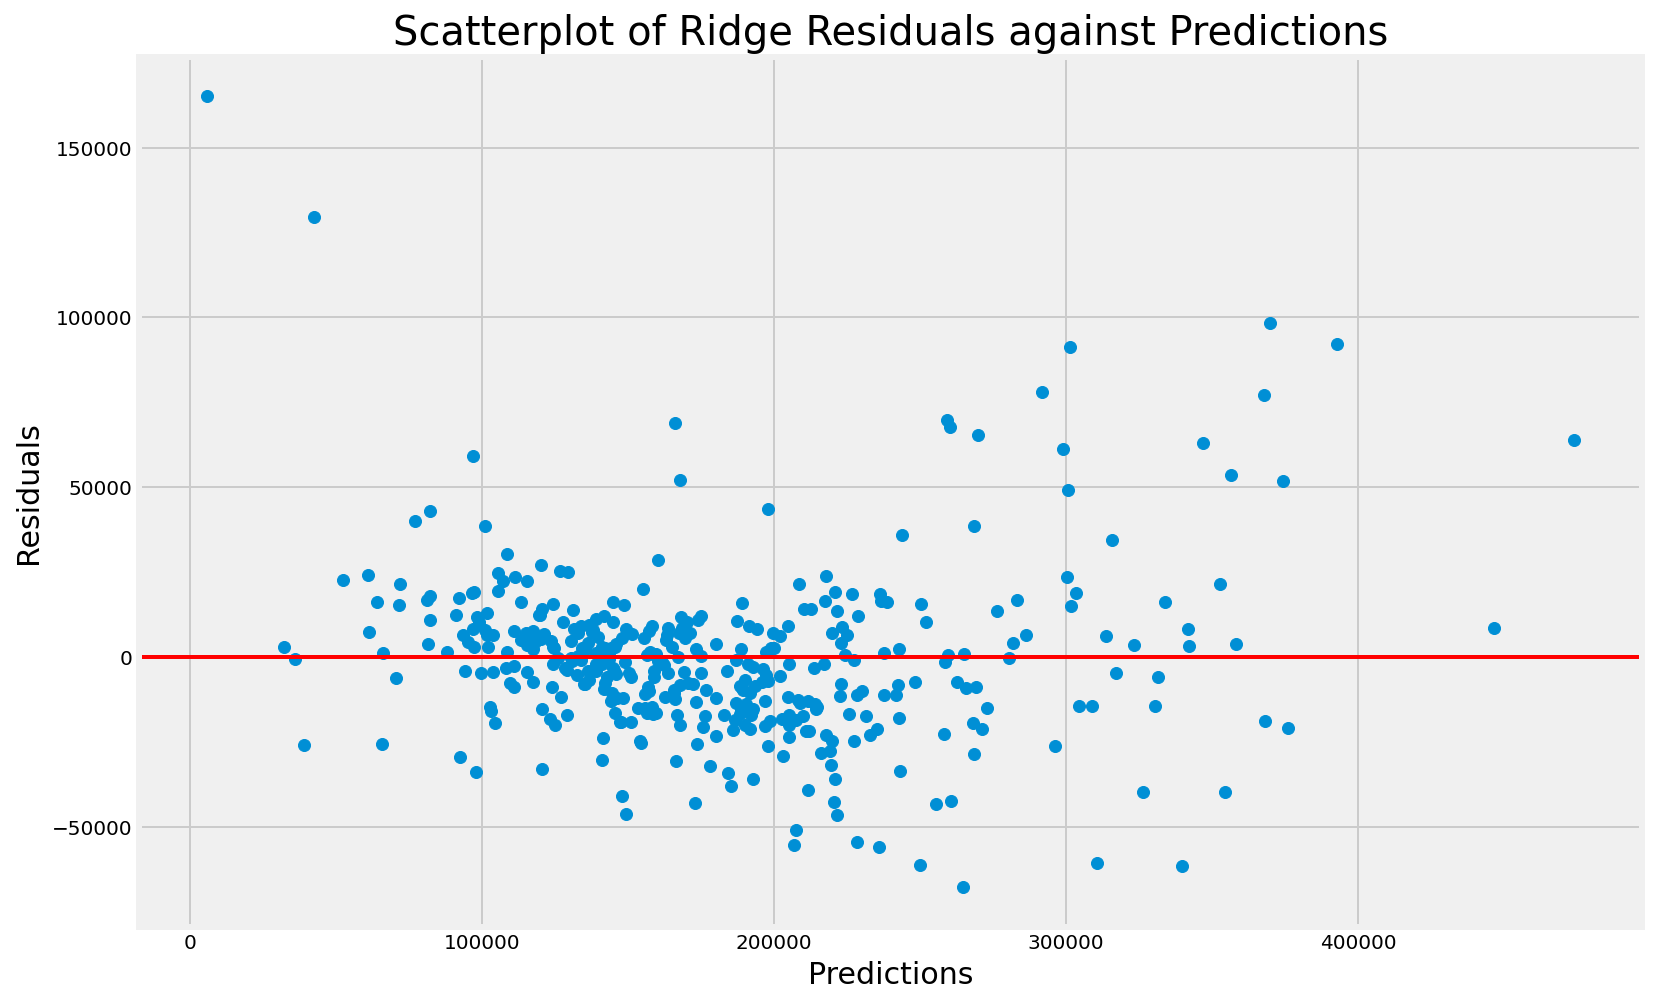

In [20]:
plt.figure(figsize=(12,8))
plt.title("Scatterplot of Ridge Residuals against Predictions", size=20)
plt.xlabel("Predictions", size=15)
plt.ylabel("Residuals", size=15)
plt.axhline(0, c='r', lw=2)

plt.scatter(predictions, residuals);
plt.savefig("../assets/scatter_ridge_01_res_pred.png") # save out figure

In [21]:
# there are a couple outliers with high variance when predicted sale price is low
# apart from these, scedasticity is somewhat present with residuals variance fairly consistent
# variance increases slightly as predictions value increases

In [22]:
# define function to eval linear regression metrics

def eval_lr_metrics(model, features_matrix, target_vector):
    predictions = model.predict(features_matrix)
    residuals = target_vector - predictions
    MAE = mean_absolute_error(target_vector, predictions)
    RSS = (residuals**2).sum()
    MSE = RSS / len(residuals)
    RMSE = np.sqrt(MSE)
    print("Mean Absolute Error is", round(MAE, 3))
    print("Residuals Sum of Squares is", round(RSS, 3))
    print("Mean Square Error is", round(MSE, 3))
    print("Root Mean Square Error is", round(RMSE, 3))

In [23]:
# evaluate linear regression model metrics
eval_lr_metrics(model=ridge, features_matrix=X_test_ss, target_vector=y_test)

Mean Absolute Error is 16919.277
Residuals Sum of Squares is 256464204312.526
Mean Square Error is 642767429.355
Root Mean Square Error is 25352.858


In [24]:
# because this is our baseline model
# the metrics above as well as the R^2 score will form our baseline metrics to evaluate our subsequent models

# since ridge regression model performed the best in the CV test
# we shall test it on the unseen test set

#### Make Predictions

In [25]:
# predict using ridge regression model
predictions = ridge.predict(X_unseen_test_ss)

In [26]:
# to submit first predictions to Kaggle
# we will need to append the corresponding "Id" to predictions and submit a df
dict_pred = {"Id": df_test_ig_dumm["Id"], "SalePrice": predictions}
pred_1 = pd.DataFrame(dict_pred).sort_values("Id").reset_index(drop=True)
pred_1.head(3)

,Id,SalePrice
0,2,121724.481497
1,4,260037.817423
2,6,214212.085424


In [27]:
def save_view_csv(df, path):
    df.to_csv(path, index=False) # index = False so csv file does not save out index as a new column
    print(df.shape) # view shape of df
    return df.head(3) # display first 3 rows of data

In [28]:
# save out 1st baseline predictions
save_view_csv(pred_1, "../output/predictions_ridge_01.csv",)

(879, 2)


,Id,SalePrice
0,2,121724.481497
1,4,260037.817423
2,6,214212.085424


In [29]:
# baseline ridge regression model about built with basic accounting for missing values
# disregarded columns include 'Alley', 'Fence', "Lot Frontage", "Garage Yr Blt", and "Mas Vnr Area"
# they are disregarded for the purposes of ignoring missing values

## Features Selection

[Back to Top!](#Executive-Summary)

#### Build Lasso Model

In [30]:
# even though lasso did not perform as well
# we can use it to select features of interest that we may be able to further improve upon

In [31]:
lasso.fit(X_train_ss, y_train);

In [32]:
lasso.score(X_train_ss, y_train) # lasso actually scored better than ridge when scored against the training set

0.9113530379753617

In [33]:
lasso.score(X_test_ss, y_test)

0.8555663044495269

In [34]:
# lasso generalised worse than the ridge regression model
# we see a bigger drop in R^2 score when tested against the training and test sets

In [35]:
predictions = lasso.predict(X_test_ss) # predict on test set
residuals = y_test - predictions # eval residuals between predictions and known target vector

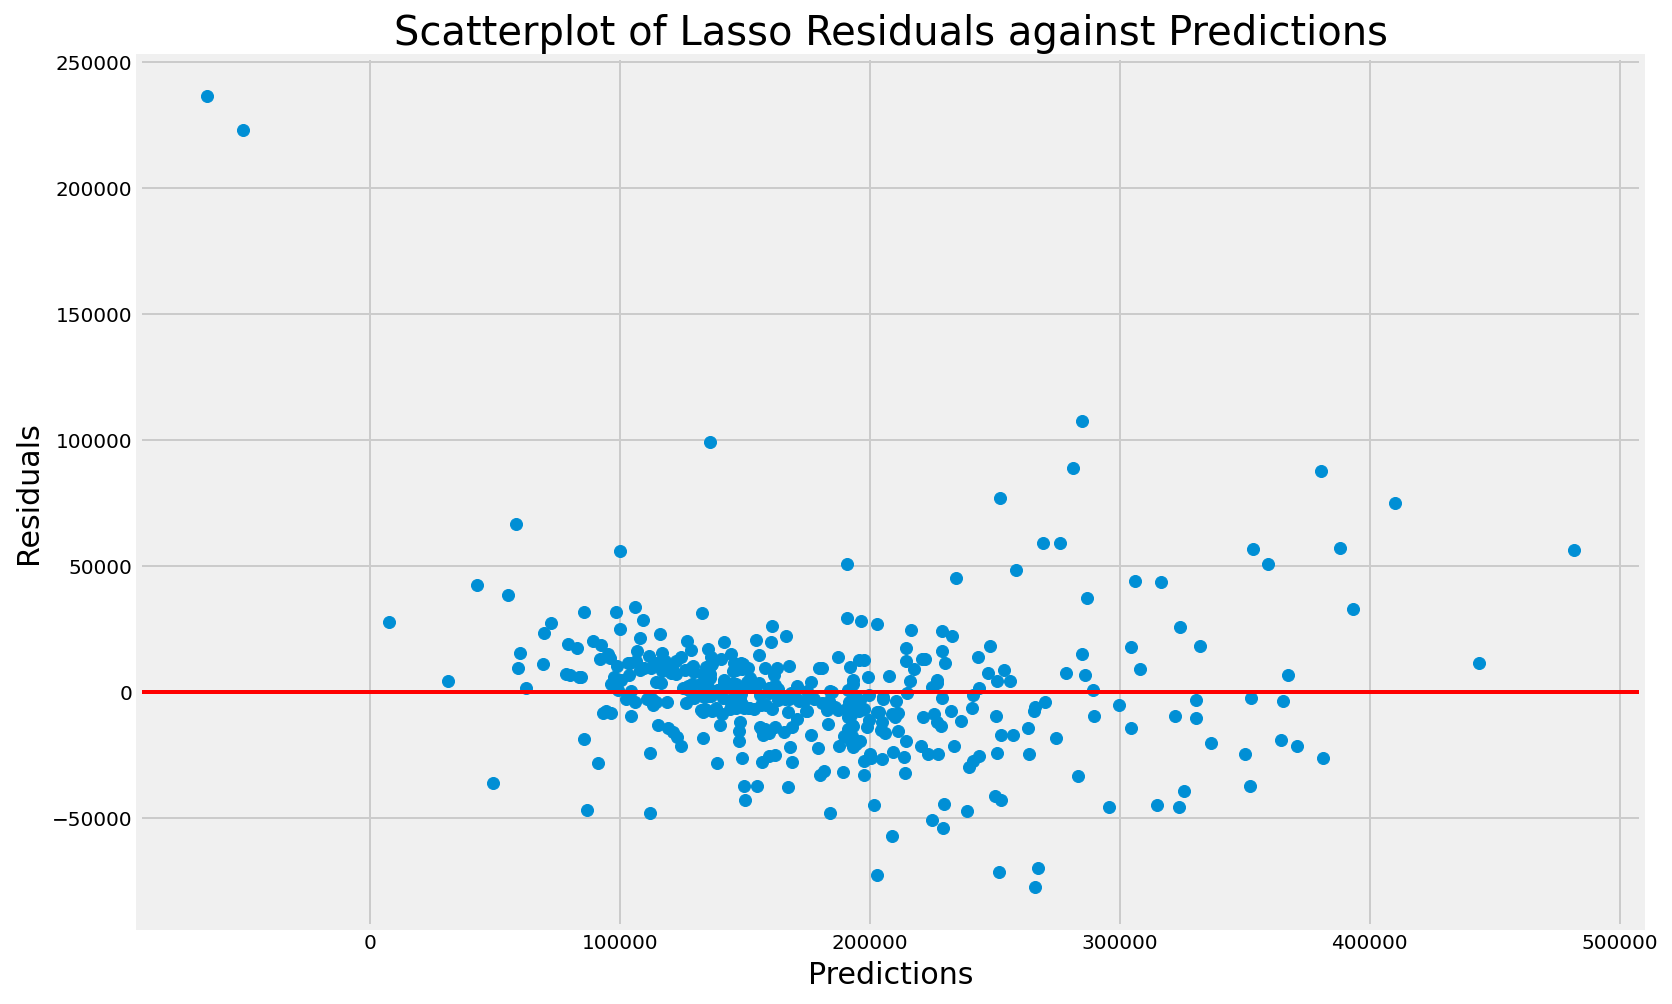

In [36]:
plt.figure(figsize=(12,8))
plt.title("Scatterplot of Lasso Residuals against Predictions", size=20)
plt.xlabel("Predictions", size=15)
plt.ylabel("Residuals", size=15)
plt.axhline(0, c='r', lw=2)

plt.scatter(predictions, residuals);
plt.savefig("../assets/scatter_lasso_02_res_pred.png") # save out figure

In [37]:
# lasso residuals appear to have a tighter variance than ridge residuals
# however, the two residual outliers are now further than with the ridge model

In [38]:
# evaluate model
eval_lr_metrics(model=lasso, features_matrix=X_test_ss, target_vector=y_test)

Mean Absolute Error is 17561.951
Residuals Sum of Squares is 329886896802.373
Mean Square Error is 826784202.512
Root Mean Square Error is 28753.855


In [39]:
# MAE is not so easily swayed by outliers
# as such, lasso's MAE is larger than ridge's MAE, therefore the tighter variance might not hold true as speculated
# RMSE performed worse as well

# the poorer metrics does not mean there is no value to the lasso model
# we can still draw upon its features selection!

#### Get Dropped Features

In [40]:
# define function to view all features dropped by lasso algo
def get_lasso_drop(model, features):
    beta_coeff = dict(zip(features, model.coef_)) # create dict of features and their corresponding coefficients
    beta_coeff = pd.DataFrame(beta_coeff.items(), columns=["Feature", "Coefficient"]) # create df from dict
    beta_coeff["Absolute_Coefficient"] = abs(beta_coeff["Coefficient"]) # create new col for magnitude of "Coefficient"
    mask = beta_coeff["Absolute_Coefficient"] == 0 # create mask for coef_ == 0
    feat_arr = beta_coeff[mask]["Feature"].values # array of features lasso deemed irrelevant
    irrelevant_features = set() # create empty set
    for feat in feat_arr:
        try:
            irrelevant_features.add(feat.split("_")[0]) # if there are dummy variables, remove dummy and isolate feature
        except:
            irrelevant_features.add(feat) # add to set if not dummy variable
    return irrelevant_features # view all irrelevant features

In [41]:
# recall features = all features in the features matrix
len(features)

254

In [42]:
dropped_features = get_lasso_drop(lasso, features) # assign set of dropped features to variable
np.array(dropped_features) # view all dropped features

array({'Pool QC', 'Lot Shape', 'Mas Vnr Type', 'Functional', 'Misc Feature', 'Paved Drive', '2nd Flr SF', 'Exterior 1st', 'Bsmt Qual', 'Kitchen Qual', 'Condition 2', 'Pool Area', 'Heating QC', 'Open Porch SF', 'Electrical', 'Id', 'Bldg Type', 'Condition 1', 'Bsmt Exposure', 'Sale Type', 'BsmtFin Type 2', 'Bsmt Unf SF', 'Bsmt Cond', 'Bsmt Half Bath', 'PID', 'Low Qual Fin SF', 'House Style', 'MS Zoning', 'Land Contour', 'Exter Qual', 'Exter Cond', 'BsmtFin Type 1', 'Roof Matl', 'Garage Type', 'Foundation', 'Fireplace Qu', 'Garage Cond', 'Central Air', 'Lot Config', 'Neighborhood', 'Land Slope', 'Enclosed Porch', '3Ssn Porch', 'Garage Finish', 'Yr Sold', 'Exterior 2nd', 'Heating', 'Roof Style', 'Bedroom AbvGr', 'Garage Qual', 'Utilities'},
      dtype=object)

In [43]:
# are the above features really unimportant to "SalePrice"?
# lasso is saying that they are not as important as the features the algo has selected
# we could revisit these dropped features at a later stage to engineer more meaningful variables

In [44]:
# create df of beta coefficients
beta_coeff = dict(zip(features, lasso.coef_)) # create dict of features and their corresponding coefficients
beta_coeff = pd.DataFrame(beta_coeff.items(), columns=["Feature", "Coefficient"]) # create df from dict
beta_coeff["Absolute_Coefficient"] = abs(beta_coeff["Coefficient"]) # create new col for magnitude of "Coefficient"
beta_coeff.head(3)

,Feature,Coefficient,Absolute_Coefficient
0,Id,-0.000000,0.000000
1,PID,-0.000000,0.000000
2,MS SubClass,-4734.620616,4734.620616


In [45]:
# filter out coefficient == 0
mask = beta_coeff["Absolute_Coefficient"] == 0 # create mask for coef_ == 0
surviving_coeff = beta_coeff[~mask] # reassign new df for coefficients != 0

#### Find Outlier Features

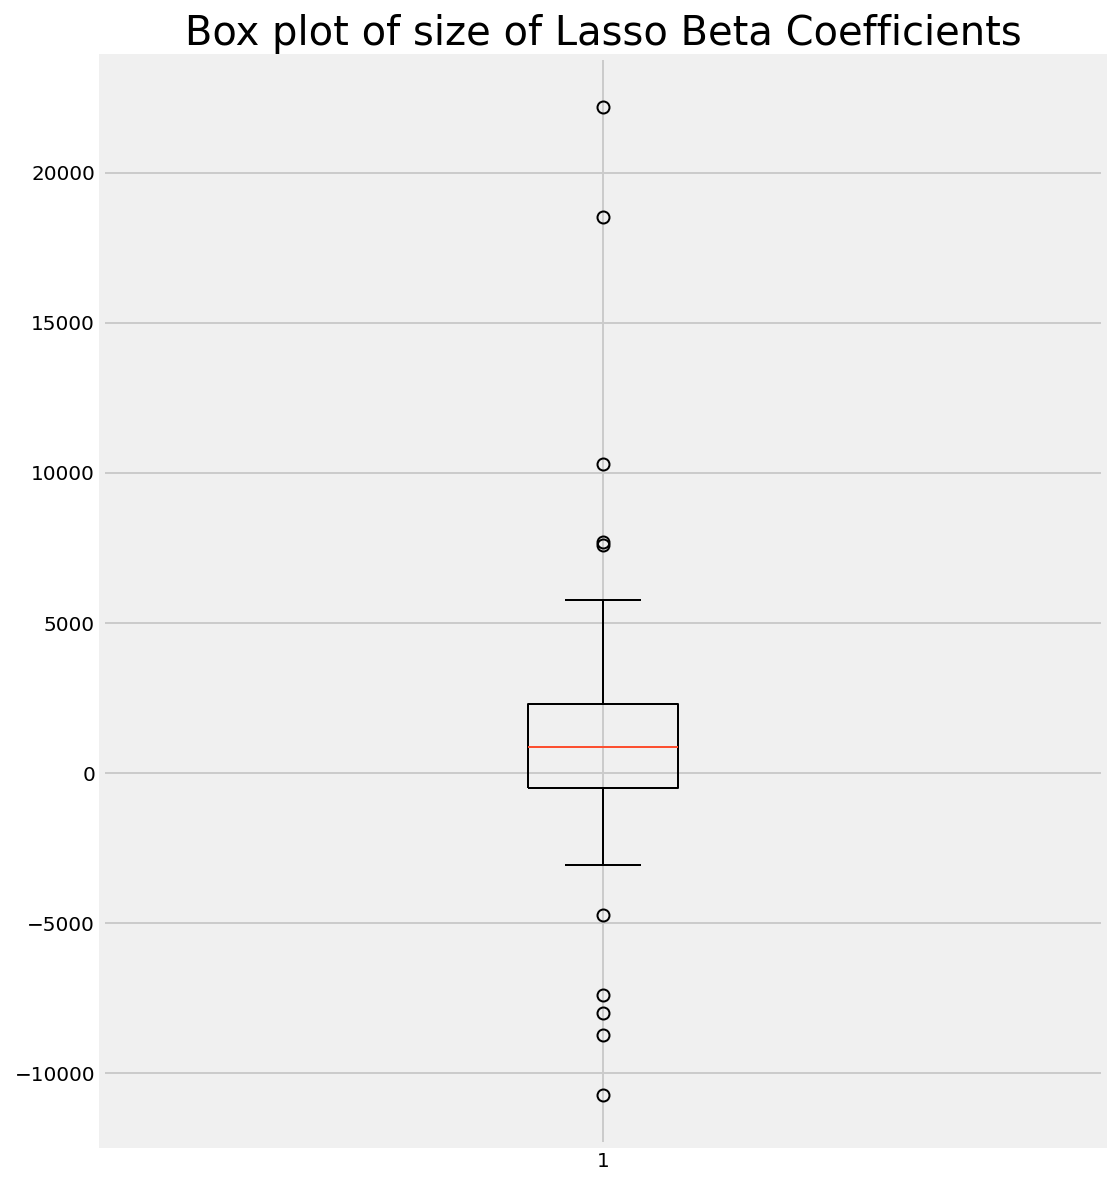

In [46]:
plt.figure(figsize=(8,10))
plt.title("Box plot of size of Lasso Beta Coefficients", size=20)

plt.boxplot(surviving_coeff["Coefficient"]);

In [47]:
# find inter-quantile range
iqr = surviving_coeff["Coefficient"].describe()["75%"] - surviving_coeff["Coefficient"].describe()["25%"]
# find lower limit
lower_limit = np.median(surviving_coeff["Coefficient"]) - (1.5*iqr)
# find upper limit
upper_limit = np.median(surviving_coeff["Coefficient"]) + (1.5*iqr)
# view lower and upper limits
print("Lower limit of IQR is", lower_limit)
print("Upper limit of IQR is", upper_limit)

Lower limit of IQR is -3354.072733694473
Upper limit of IQR is 5092.532527576715


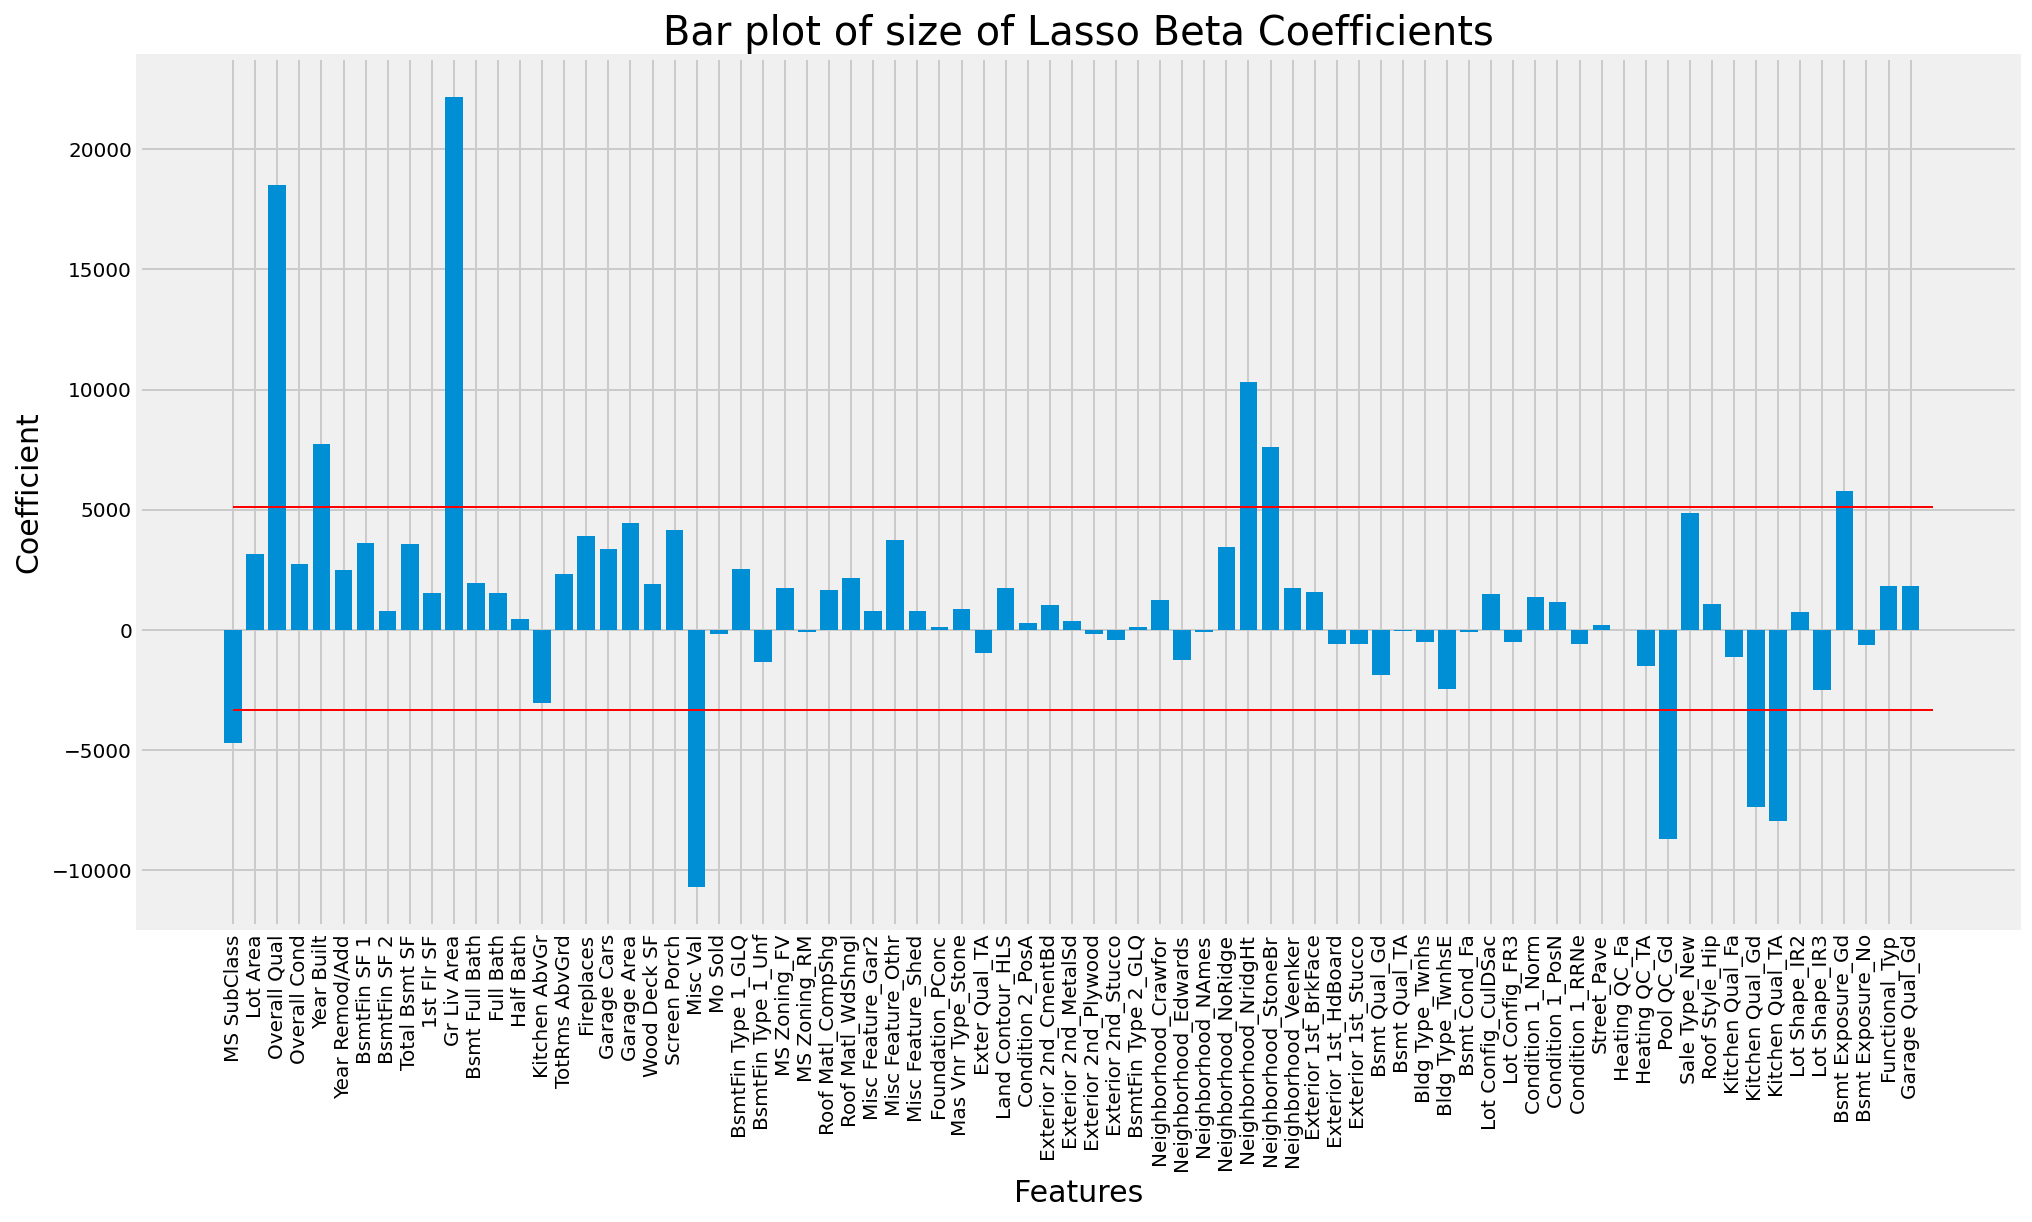

In [48]:
# to find outlier coefficients

plt.figure(figsize=(15,8))
plt.title("Bar plot of size of Lasso Beta Coefficients", size=20)
plt.xlabel("Features", size=15)
plt.xticks(rotation=90)
plt.ylabel("Coefficient", size=15)

# plot lower and upper limits
plt.plot((0, len(surviving_coeff)), (lower_limit, lower_limit), color="r", lw=1)
plt.plot((0, len(surviving_coeff)), (upper_limit, upper_limit), color="r", lw=1)

# plot bar chart of all beta coefficients in lasso
plt.bar(height=surviving_coeff["Coefficient"], x=surviving_coeff["Feature"]);
plt.savefig("../assets/bar_lasso_02_coeff.png") # save out figure

In [49]:
# we can count 11 outlier features that contributed greatly to the predictions

In [50]:
# to find the 11 outlier features
mask_upper = beta_coeff["Coefficient"] > upper_limit
mask_lower = beta_coeff["Coefficient"] < lower_limit
beta_coeff[mask_upper | mask_lower].sort_values(by="Absolute_Coefficient", ascending=False)

,Feature,Coefficient,Absolute_Coefficient
15,Gr Liv Area,22196.851006,22196.851006
4,Overall Qual,18524.549675,18524.549675
32,Misc Val,-10726.120945,10726.120945
129,Neighborhood_NridgHt,10300.359920,10300.359920
199,Pool QC_Gd,-8733.254940,8733.254940
223,Kitchen Qual_TA,-7978.074950,7978.074950
6,Year Built,7713.590345,7713.590345
135,Neighborhood_StoneBr,7589.222702,7589.222702
221,Kitchen Qual_Gd,-7394.004763,7394.004763
234,Bsmt Exposure_Gd,5777.488356,5777.488356


In [51]:
# save outoutlier features
outlier_features = beta_coeff[mask_upper | mask_lower].sort_values(by="Absolute_Coefficient", ascending=False)["Feature"]
len(outlier_features)

11

In [52]:
# note that certain outlier features are actually dummy variables
# some of these dummies even belong to features in the irrelevant_features set above

# this means that these features are, in fact, important
# it is simply the undesirable dummies that have been surpressed
# this therefore also suggests that the ordinal nature of these features could be important
# and probably better expressed as ordinal integers than individual dummy variables

## Improve Model with Selected Features

[Back to Top!](#Executive-Summary)

#### Iterate Lasso Experiment

In [53]:
# what if we iterate lassos to drop features until we are left with the last standing 10 features?

In [54]:
mask = beta_coeff["Absolute_Coefficient"] == 0 # create mask for coef_ == 0
feat_arr = beta_coeff[mask]["Feature"].values # array of features lasso deemed irrelevant and features that we want to drop

In [55]:
X.shape # shape of original X features matrix

(1596, 254)

In [56]:
y.shape # shape of original y target vector

(1596,)

In [57]:
df_test_ig_dumm.shape # shape of original unseen X features matrix

(879, 254)

In [58]:
# select remaining features after lasso's features selection
X_lasso_drp1 = X[X.columns[~X.columns.isin(feat_arr)]]
X_lasso_drp1.shape
# there are 77 features remaining

(1596, 77)

In [59]:
# select remaining features after lasso's features selection
X_unseen_lasso_drp1 = df_test_ig_dumm[X.columns[~X.columns.isin(feat_arr)]]
X_unseen_lasso_drp1.shape

(879, 77)

In [60]:
# train-test split on training set
X_train, X_test, y_train, y_test = train_test_split(X_lasso_drp1, y, test_size=0.25, random_state=42)

In [61]:
# scale
ss = StandardScaler()

# fit
ss.fit(X_train)

# transform
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)
X_unseen_test_ss = ss.transform(X_unseen_lasso_drp1) # create features matrix for unseen data

In [62]:
# instantiate lasso model
lasso = LassoCV(n_alphas=200)

In [63]:
# fit lasso model
lasso.fit(X_train_ss, y_train)

LassoCV(n_alphas=200)

In [64]:
lasso.score(X_train_ss, y_train)

0.9242304681637731

In [65]:
lasso.score(X_test_ss, y_test)

0.84909106189514

In [66]:
# R^2 score deproved slightly so far
# perhaps lasso has zeroed out too many features

In [67]:
predictions = lasso.predict(X_test_ss) # predict on test set
residuals = y_test - predictions # eval residuals between predictions and known target vector

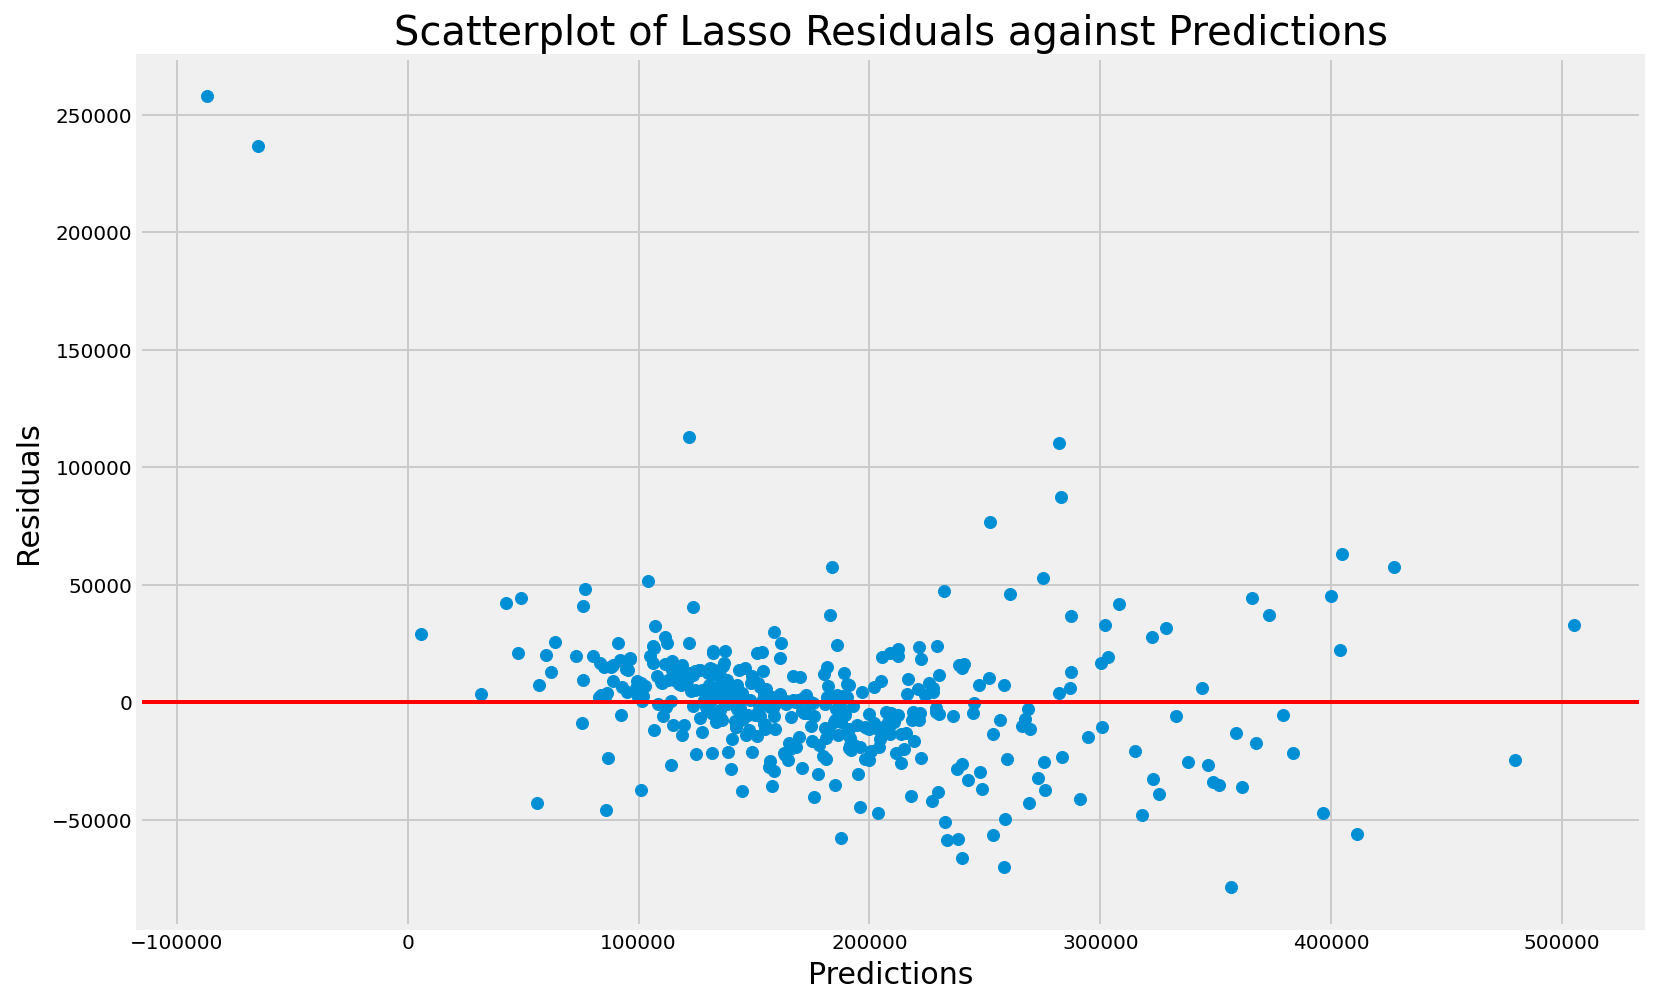

In [68]:
plt.figure(figsize=(12,8))
plt.title("Scatterplot of Lasso Residuals against Predictions", size=20)
plt.xlabel("Predictions", size=15)
plt.ylabel("Residuals", size=15)
plt.axhline(0, c='r', lw=2)

plt.scatter(predictions, residuals);
plt.savefig("../assets/scatter_lasso_03_res_pred.png") # save out figure

In [69]:
# evaluate model
eval_lr_metrics(model=lasso, features_matrix=X_test_ss, target_vector=y_test)

Mean Absolute Error is 18073.36
Residuals Sum of Squares is 344676365867.525
Mean Square Error is 863850541.021
Root Mean Square Error is 29391.334


In [70]:
# this second pass of lasso over an already trimmed features matrix trimmed the matrix even further
# metrics is the worst so far of all the models
# but it appears to have the least amount of variance if not for the two extreme outliers

In [71]:
beta_coeff = dict(zip(features, lasso.coef_)) # create dict of features and its corresponding coefficients
beta_coeff = pd.DataFrame(beta_coeff.items(), columns=["Feature", "Coefficient"]) # create df from dict
beta_coeff["Absolute_Coefficient"] = abs(beta_coeff["Coefficient"]) # create new col for magnitude of "Coefficient"
beta_coeff.sort_values(by="Absolute_Coefficient", ascending=False).head(10) # view top 10 features

,Feature,Coefficient,Absolute_Coefficient
10,Bsmt Unf SF,19380.963197,19380.963197
70,Foundation_Slab,-16115.530217,16115.530217
69,Foundation_PConc,-15551.886623,15551.886623
21,Kitchen AbvGr,-13395.440212,13395.440212
2,MS SubClass,12798.153879,12798.153879
46,MS Zoning_I (all),9930.955685,9930.955685
4,Overall Qual,9749.790925,9749.790925
65,Garage Type_CarPort,-9667.281609,9667.281609
47,MS Zoning_RH,8247.617572,8247.617572
73,Mas Vnr Type_BrkFace,6332.764152,6332.764152


In [72]:
# certain features are in the top 10 again (such as "Overall Qual" and "MS SubClass", etc)

# however, certain features do not make much sense

### for example, "MS SubClass" is actually a feature that types the dwellings into numerically-coded categories
### for it to receive so much weight as the second strongest feature indicates 
##### either that the numeric codes follow some sort of ordinal rank
##### or that the model is overfitting and drawing strange relationships
### either way, "MS SubClass" deserves a closer look and should be dummied to be more meaningfully interpreted

### "Bsmt Unf SF" measures the area of the unfinished basement level
### as such, it also does not make sense for it to be the top performing predictor of sale price

In [73]:
len(beta_coeff[beta_coeff["Absolute_Coefficient"]==0]) # only 1 feature have been zeroed out by the second pass of lasso

1

In [74]:
# even though only 1 feature have been dropped
# the features emphasised now do not make much sense
# perhaps there are underlying relationships picked up by the model that we don't see
# however, it would be better to halt the experiment and take a closer look at our

# that is not to say that the iterative-lasso experiment has been a failure
# if anything, it has shown promise since the R^2 score did not drop substantially
# but it has also highlighted the irrelevance of certain features part of the matrix that are skewing the predictions
# the iterative-lasso method may find better results with a better designed features matrix

#### Make Predictions

In [75]:
# predict using ridge regression model
predictions = lasso.predict(X_unseen_test_ss)

In [76]:
# append corresponding "Id" to predictions
dict_pred = {"Id": df_test_ig_dumm["Id"], "SalePrice": predictions}
pred_2 = pd.DataFrame(dict_pred).sort_values("Id").reset_index(drop=True)
pred_2.head(3)

,Id,SalePrice
0,2,118760.506760
1,4,295459.421194
2,6,206107.634116


In [77]:
# save out 2nd ridge regression model
save_view_csv(pred_2, "../output/predictions_lasso_03.csv",)

(879, 2)


,Id,SalePrice
0,2,118760.506760
1,4,295459.421194
2,6,206107.634116


In [78]:
# second pass with a lasso regression model
# features were disregarded through features selection with a first pass also using the lasso algorithm

#### Build Ridge Model

In [79]:
# let's also try applying the ridge model to the 77 features matrix as selected by the the first pass of lasso

In [80]:
# instantiate model
ridge = RidgeCV(alphas=np.logspace(0,5,200))

In [81]:
# fit ridge model
ridge.fit(X_train_ss, y_train);

In [82]:
ridge.score(X_train_ss, y_train)
# training set score is similar to first ridge

0.9085759426758064

In [83]:
ridge.score(X_test_ss, y_test)
# test set score did not drop by too much

0.8782533030593332

In [84]:
predictions = ridge.predict(X_test_ss) # predict on test set
residuals = y_test - predictions # eval residuals between predictions and known target vector

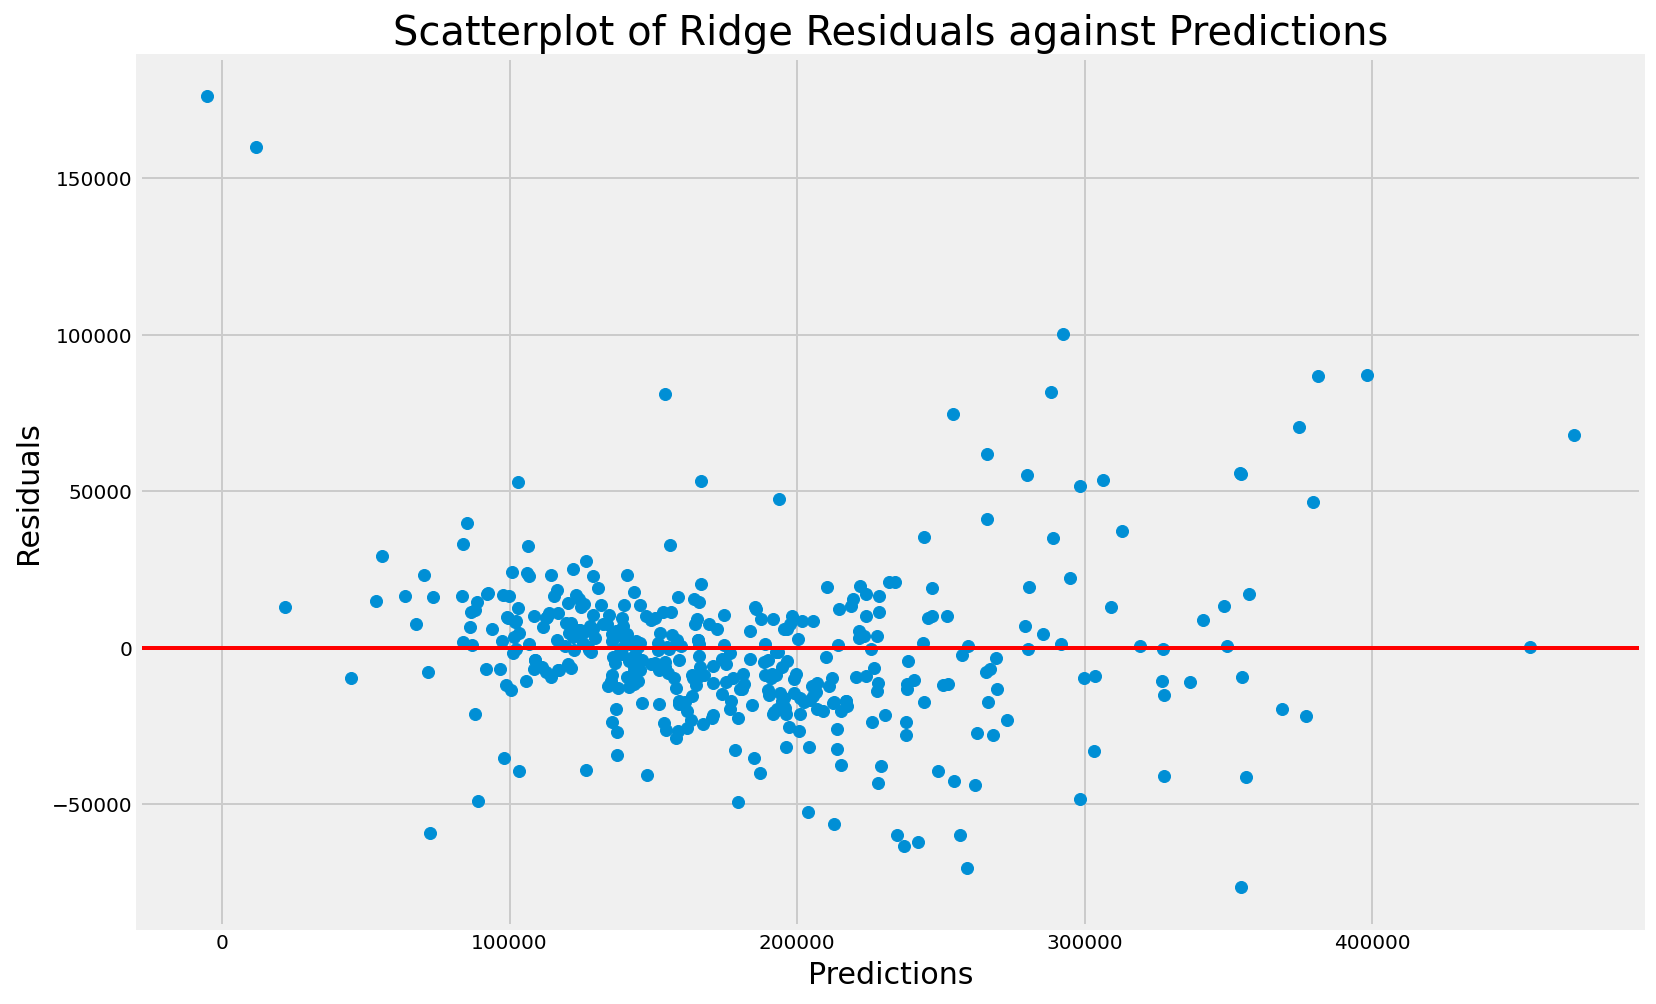

In [85]:
plt.figure(figsize=(12,8))
plt.title("Scatterplot of Ridge Residuals against Predictions", size=20)
plt.xlabel("Predictions", size=15)
plt.ylabel("Residuals", size=15)
plt.axhline(0, c='r', lw=2)

plt.scatter(predictions, residuals);
plt.savefig("../assets/scatter_ridge_04_res_pred.png") # save out figure

In [86]:
# as we can observed, we lost the two outliers when predictions are low
# however, the variance as predictions increase appears to have increased too

In [87]:
# evaluate linear regression model metrics
eval_lr_metrics(model=ridge, features_matrix=X_test_ss, target_vector=y_test)

Mean Absolute Error is 17429.989
Residuals Sum of Squares is 278069739174.266
Mean Square Error is 696916639.535
Root Mean Square Error is 26399.179


In [88]:
# model performance is comparable but slightly worse than the baseline ridge model

#### Make Predictions

In [89]:
# predict using ridge regression model
predictions = ridge.predict(X_unseen_test_ss)

In [90]:
# append corresponding "Id" to predictions
dict_pred = {"Id": df_test_ig_dumm["Id"], "SalePrice": predictions}
pred_2 = pd.DataFrame(dict_pred).sort_values("Id").reset_index(drop=True)
pred_2.head(3)

,Id,SalePrice
0,2,119969.902660
1,4,278250.153582
2,6,206423.598487


In [91]:
# save out 2nd ridge regression model
save_view_csv(pred_2, "../output/predictions_ridge_04.csv",)

(879, 2)


,Id,SalePrice
0,2,119969.902660
1,4,278250.153582
2,6,206423.598487


In [92]:
# second pass with a ridge regression model
# features were disregarded through features selection with a first pass using the lasso algorithm

## Re-engineer for New Model

[Back to Top!](#Executive-Summary)

#### Store Variables

In [93]:
# taking heed from above features selection
# we will revert to data cleaning notebook to engineer more meaningful features

In [94]:
# store outlier_features to read in data cleaning notebook
%store outlier_features
# recall outlier features
outlier_features.values

Stored 'outlier_features' (Series)


array(['Gr Liv Area', 'Overall Qual', 'Misc Val', 'Neighborhood_NridgHt',
       'Pool QC_Gd', 'Kitchen Qual_TA', 'Year Built',
       'Neighborhood_StoneBr', 'Kitchen Qual_Gd', 'Bsmt Exposure_Gd',
       'MS SubClass'], dtype=object)

In [95]:
# certain features are originally dummy variables that come from ordinal features
# ordinal relationship has been lost when dummied
# we can reclaim ordinal relationships for these features so model can more meaningfully predict from them

In [96]:
rem_features = X_train.columns # extract list of 77 features
# store rem_features to read in data cleaning notebook
%store rem_features
# recall distilled features matrix with only 77 features
rem_features

Stored 'rem_features' (Index)


Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Screen Porch', 'Misc Val', 'Mo Sold',
       'BsmtFin Type 1_GLQ', 'BsmtFin Type 1_Unf', 'MS Zoning_FV',
       'MS Zoning_RM', 'Roof Matl_CompShg', 'Roof Matl_WdShngl',
       'Misc Feature_Gar2', 'Misc Feature_Othr', 'Misc Feature_Shed',
       'Foundation_PConc', 'Mas Vnr Type_Stone', 'Exter Qual_TA',
       'Land Contour_HLS', 'Condition 2_PosA', 'Exterior 2nd_CmentBd',
       'Exterior 2nd_MetalSd', 'Exterior 2nd_Plywood', 'Exterior 2nd_Stucco',
       'BsmtFin Type 2_GLQ', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Neighborhood_Vee

#### Import Cleaned and Re-engineered DataFrames

In [97]:
df_test_sel_dumm = pd.read_csv("../datasets/df_test_sel_dumm.csv")
df_test_sel_dumm.shape

(879, 203)

In [98]:
df_test_sel_dumm.head(3)

,1st Flr SF,Screen Porch,Misc Val,Year Remod/Add,Half Bath,BsmtFin SF 2,Wood Deck SF,Lot Area,Total Bsmt SF,TotRms AbvGrd,...,Functional_Sal,Functional_Sev,Functional_Typ,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA
0,908,0,0,1950,0,0.0,0,9142,1020.0,9,...,0,0,1,0,0,1,0,0,1,0
1,1967,0,0,1977,0,0.0,170,9662,1967.0,10,...,0,0,1,0,0,1,0,0,0,1
2,664,0,0,2006,1,0.0,100,17104,654.0,7,...,0,0,1,0,1,0,0,0,0,1


In [99]:
df_train_sel_dumm = pd.read_csv("../datasets/df_train_sel_dumm.csv")
df_train_sel_dumm.shape

(2048, 204)

In [100]:
df_train_sel_dumm.head(3)

,1st Flr SF,Screen Porch,Misc Val,Year Remod/Add,SalePrice,Half Bath,BsmtFin SF 2,Wood Deck SF,Lot Area,Total Bsmt SF,...,Functional_Sal,Functional_Sev,Functional_Typ,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA
0,725,0,0,2005,130500.0,1,0.0,0,13517,725.0,...,0,0,1,0,1,0,0,0,0,1
1,913,0,0,1997,220000.0,1,0.0,0,11492,913.0,...,0,0,1,0,1,0,0,0,0,1
2,1057,0,0,2007,109000.0,0,0.0,0,7922,1057.0,...,0,0,1,0,0,1,0,0,0,1


#### Prepare Features Matrix and Target Vector

In [101]:
# set X and y for training set
features = [feat for feat in df_train_sel_dumm._get_numeric_data().columns if feat != "SalePrice"] # exclude target
X = df_train_sel_dumm[features] # create features matrix
y = df_train_sel_dumm["SalePrice"] # create target vector

In [102]:
print(X.shape)
print(y.shape)

(2048, 203)
(2048,)


In [103]:
#train-test split on training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [104]:
# scale
ss = StandardScaler()

# fit
ss.fit(X_train)

# transform
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)
X_unseen_test_ss = ss.transform(df_test_sel_dumm) # create features matrix for unseen data

In [105]:
X_train_ss.shape

(1536, 203)

In [106]:
X_test_ss.shape

(512, 203)

In [107]:
X_unseen_test_ss.shape

(879, 203)

#### Evaluate Algorithms

In [108]:
# instantiate models
ridge = RidgeCV(alphas=np.logspace(0,5,200))
lasso = LassoCV(n_alphas=200)
enet = ElasticNetCV(l1_ratio=np.linspace(0.001,1,50), n_alphas=200)

In [109]:
%%time
# evaluate score of ridge algo
ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv=5)
print("Ridge algorithm has a R^2 score of", np.mean(ridge_scores))

Ridge algorithm has a R^2 score of 0.8476795695014516
Wall time: 3.47 s


In [110]:
%%time
# evaluate score of lasso algo
lasso_scores = cross_val_score(lasso, X_train_ss, y_train, cv=5)
print("Lasso algorithm has a R^2 score of", np.mean(lasso_scores))

Lasso algorithm has a R^2 score of 0.8285885309254513
Wall time: 7.4 s


In [111]:
%%time
# evaluate score of enet algo
enet_scores = cross_val_score(enet, X_train_ss, y_train, cv=5)
print("ElasticNet algorithm has a R^2 score of", np.mean(enet_scores))

ElasticNet algorithm has a R^2 score of 0.8153638416535303
Wall time: 1min 26s


In [112]:
# the CV scores as a whole performed worse than even our very first CV test
# as such, we shall relook at our features matrix before proceeding with building any more models

## Re-engineer for New Model, Again!

[Back to Top!](#Executive-Summary)

In [113]:
# because cv scores of previous model worsened
# selected 77 features were relooked at again in the data notebook

# where they were dummies of a categorical feature, the categorical feature was selected and re-dummied out
# features that do not make sense were dropped and new (more meaningful) features were created
# outliers found were also dropped

#### Import Cleaned and Re-engineered DataFrames

In [114]:
df_test_sel_dumm = pd.read_csv("../datasets/df_test_sel_dumm_2.csv")
df_test_sel_dumm.shape

(879, 215)

In [115]:
df_test_sel_dumm.head(3)

,1st Flr SF,Screen Porch,Misc Val,Year Remod/Add,Half Bath,Wood Deck SF,Lot Area,Total Bsmt SF,TotRms AbvGrd,Fireplaces,...,Functional_Sal,Functional_Sev,Functional_Typ,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA
0,908,0,0,1950,0,0,9142,1020.0,9,0,...,0,0,1,0,0,1,0,0,1,0
1,1967,0,0,1977,0,170,9662,1967.0,10,0,...,0,0,1,0,0,1,0,0,0,1
2,664,0,0,2006,1,100,17104,654.0,7,1,...,0,0,1,0,1,0,0,0,0,1


In [116]:
df_train_sel_dumm = pd.read_csv("../datasets/df_train_sel_dumm_2.csv")
df_train_sel_dumm.shape

(2046, 216)

In [117]:
df_train_sel_dumm.head(3)

,1st Flr SF,Screen Porch,Misc Val,Year Remod/Add,SalePrice,Half Bath,Wood Deck SF,Lot Area,Total Bsmt SF,TotRms AbvGrd,...,Functional_Sal,Functional_Sev,Functional_Typ,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA
0,725,0,0,2005,130500.0,1,0,13517,725.0,6,...,0,0,1,0,1,0,0,0,0,1
1,913,0,0,1997,220000.0,1,0,11492,913.0,8,...,0,0,1,0,1,0,0,0,0,1
2,1057,0,0,2007,109000.0,0,0,7922,1057.0,5,...,0,0,1,0,0,1,0,0,0,1


#### Prepare Features Matrix and Target Vector

In [118]:
# set X and y for training set
features = [feat for feat in df_train_sel_dumm._get_numeric_data().columns if feat != "SalePrice"] # exclude target
X = df_train_sel_dumm[features] # create features matrix
y = df_train_sel_dumm["SalePrice"] # create target vector

In [119]:
print(X.shape)
print(y.shape)

(2046, 215)
(2046,)


In [120]:
#train-test split on training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [121]:
# scale
ss = StandardScaler()

# fit
ss.fit(X_train)

# transform
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)
X_unseen_test_ss = ss.transform(df_test_sel_dumm) # create features matrix for unseen data

In [122]:
X_train_ss.shape

(1534, 215)

In [123]:
X_test_ss.shape

(512, 215)

In [124]:
X_unseen_test_ss.shape

(879, 215)

#### Evaluate Algorithms

In [125]:
# instantiate models
ridge = RidgeCV(alphas=np.logspace(0,5,200))
lasso = LassoCV(n_alphas=200)
enet = ElasticNetCV(l1_ratio=np.linspace(0.001,1,50), n_alphas=200)

In [126]:
%%time
# evaluate score of ridge algo
ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv=5)
print("Ridge algorithm has a R^2 score of", np.mean(ridge_scores))

Ridge algorithm has a R^2 score of 0.9135268103358178
Wall time: 3.65 s


In [127]:
%%time
# evaluate score of lasso algo
lasso_scores = cross_val_score(lasso, X_train_ss, y_train, cv=5)
print("Lasso algorithm has a R^2 score of", np.mean(lasso_scores))

Lasso algorithm has a R^2 score of 0.9165629096743292
Wall time: 2.98 s


In [128]:
%%time
# evaluate score of enet algo
enet_scores = cross_val_score(enet, X_train_ss, y_train, cv=5)
print("ElasticNet algorithm has a R^2 score of", np.mean(enet_scores))

ElasticNet algorithm has a R^2 score of 0.9165629096743292
Wall time: 1min 31s


In [129]:
# the CV scores as a whole performed better than any CV test before
# lasso regression model performed the best
# enet performed just as well, which likely means that its l1-ratio has is at 100% lasso, but took a much longer time to run
# as such, we shall proceed with fitting lasso regression to our model

#### Build Lasso Model

In [130]:
# fit ridge model to our training set
lasso.fit(X_train_ss, y_train);

In [131]:
lasso.score(X_train_ss, y_train)
# notice ridge score is better than above CV score
# this is because this score is based on training data to training target that the ridge model is fitted on

0.9353184781704502

In [132]:
lasso.score(X_test_ss, y_test)
# not a big drop when applying model to test set
# R^2 score remains fairly stable
# therefore model is generalising well on unseen data

0.9204354030257952

In [133]:
# lasso score is the best we have seen so far

In [134]:
predictions = lasso.predict(X_test_ss) # predict on test set
residuals = y_test - predictions # eval residuals between predictions and known target vector

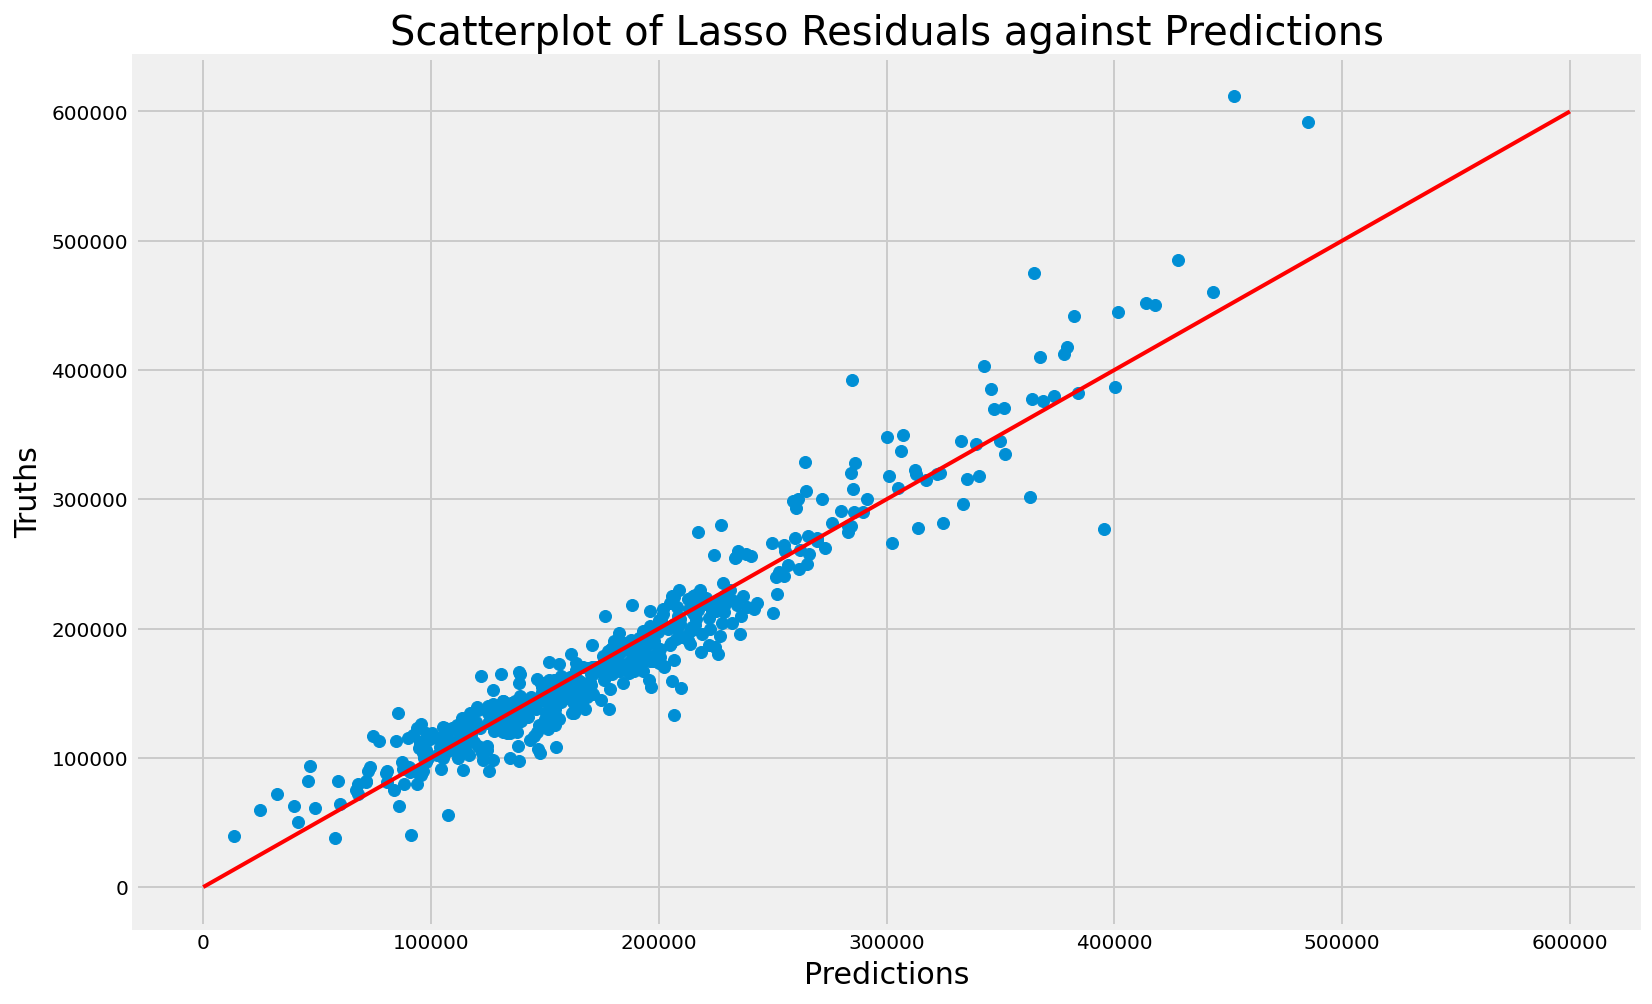

In [135]:
plt.figure(figsize=(12,8))
plt.title("Scatterplot of Lasso Residuals against Predictions", size=20)
plt.xlabel("Predictions", size=15)
plt.ylabel("Truths", size=15)
plt.plot((0,600000), (0, 600000), c='r', lw=2)

plt.scatter(predictions, y_test);
plt.savefig("../assets/scatter_lasso_05_true_pred.png") # save out figure

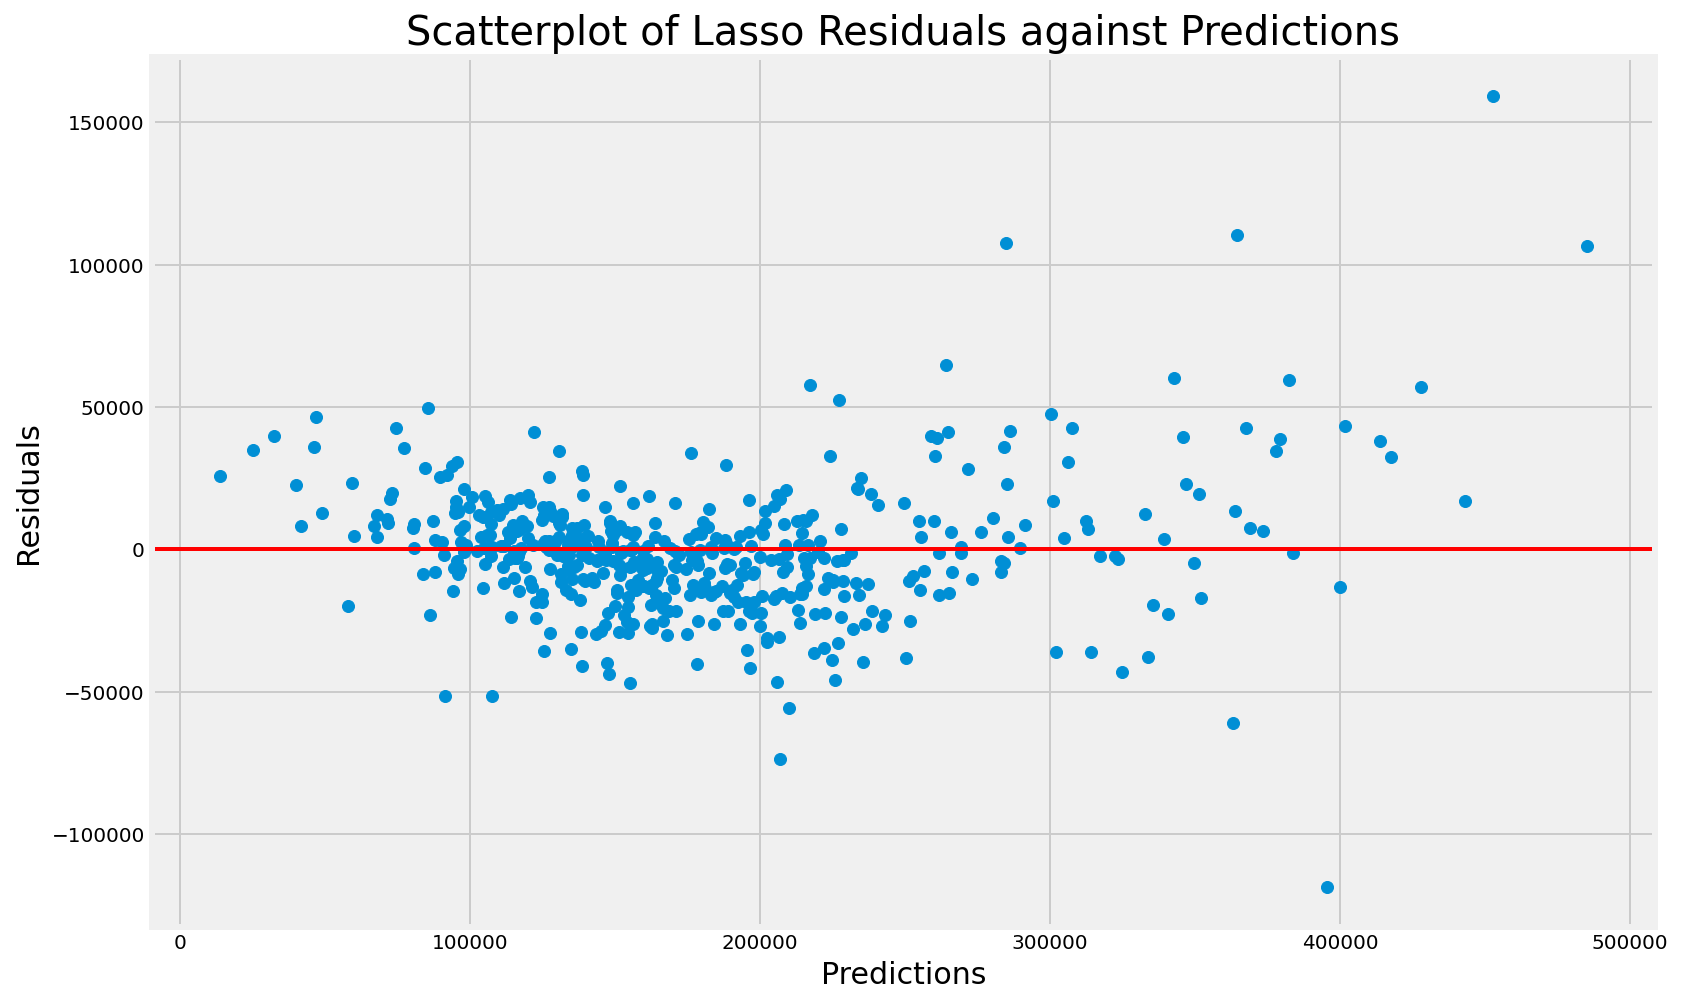

In [136]:
plt.figure(figsize=(12,8))
plt.title("Scatterplot of Lasso Residuals against Predictions", size=20)
plt.xlabel("Predictions", size=15)
plt.ylabel("Residuals", size=15)
plt.axhline(0, c='r', lw=2)

plt.scatter(predictions, residuals);
plt.savefig("../assets/scatter_lasso_05_res_pred.png") # save out figure

In [137]:
# evaluate linear regression model metrics
eval_lr_metrics(model=lasso, features_matrix=X_test_ss, target_vector=y_test)

Mean Absolute Error is 15667.263
Residuals Sum of Squares is 269755028529.607
Mean Square Error is 526865290.097
Root Mean Square Error is 22953.546


In [138]:
# compared to all previous models, this lasso model has the best metrics so far

In [139]:
lasso.alpha_ # lasso alpha is not too big, regularisation was slight

335.2532997072739

#### Make Predictions

In [140]:
# let's predict!
predictions = lasso.predict(X_unseen_test_ss)

In [141]:
# append corresponding "Id" to predictions to submit df
dict_pred = {"Id": df_test_ig_dumm["Id"], "SalePrice": predictions}
pred_3 = pd.DataFrame(dict_pred).sort_values("Id").reset_index(drop=True)
pred_3.head(3)

,Id,SalePrice
0,2,123136.297656
1,4,285183.996342
2,6,200955.627284


In [142]:
# save out 3rd baseline predictions
save_view_csv(pred_3, "../output/predictions_lasso_05.csv")

(879, 2)


,Id,SalePrice
0,2,123136.297656
1,4,285183.996342
2,6,200955.627284


In [143]:
# third predictions with model no. 05
# features initially selected by lasso
# subsequently, features were given a deeper look and re-curated

## Simple Linear Regression

#### Build Linear Regression Model

In [144]:
# since our model is working well
# let's try fitting it with the simple linear regression model instead without scaling our features
# not scaling our features will allow us to make more meaningful use of our coefficients

In [145]:
# recall unscaled features matrix and target vector
print(X_train.shape)
print(y_train.shape)

(1534, 215)
(1534,)


In [146]:
# instantiate model
lr = LinearRegression()

In [147]:
# fit and score on training set
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.9407229692929393

In [148]:
# score against test set
lr.score(X_test, y_test)

0.92035023401233

In [149]:
# lr model is generalising pretty well and scoring just as high as the lasso model above
# our lr model is able to explain for 92% of all variance in test predictions encountered

In [150]:
eval_lr_metrics(lr, X_test, y_test)

Mean Absolute Error is 15914.373
Residuals Sum of Squares is 270043784716.792
Mean Square Error is 527429267.025
Root Mean Square Error is 22965.828


In [151]:
# model metrics are really good too and comparable to the lasso model from before

#### Make Predictions

In [152]:
# recall unscaled unseen test set
df_test_sel_dumm.head(3)

,1st Flr SF,Screen Porch,Misc Val,Year Remod/Add,Half Bath,Wood Deck SF,Lot Area,Total Bsmt SF,TotRms AbvGrd,Fireplaces,...,Functional_Sal,Functional_Sev,Functional_Typ,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA
0,908,0,0,1950,0,0,9142,1020.0,9,0,...,0,0,1,0,0,1,0,0,1,0
1,1967,0,0,1977,0,170,9662,1967.0,10,0,...,0,0,1,0,0,1,0,0,0,1
2,664,0,0,2006,1,100,17104,654.0,7,1,...,0,0,1,0,1,0,0,0,0,1


In [153]:
# let's predict!
predictions = lr.predict(df_test_sel_dumm)

In [154]:
# append corresponding "Id" to predictions to submit df
dict_pred = {"Id": df_test_ig_dumm["Id"], "SalePrice": predictions}
pred_4 = pd.DataFrame(dict_pred).sort_values("Id").reset_index(drop=True)
pred_4.head(3)

,Id,SalePrice
0,2,133115.368442
1,4,282497.468998
2,6,200174.888609


In [155]:
# save out 4th set of predictions
save_view_csv(pred_4, "../output/predictions_lr_06.csv")

(879, 2)


,Id,SalePrice
0,2,133115.368442
1,4,282497.468998
2,6,200174.888609


In [156]:
# fourth predictions with model no. 06
# features initially selected by lasso
# no scaling done to features this time for use of the simple linear regression model

#### Find Coefficients

In [157]:
# we are satisfied with our model
# let's find the intercept and coefficients of the model

In [158]:
lr.intercept_ # intercept of lasso model

-857785.8227219702

In [159]:
features = X_train.columns # create list of all features

In [160]:
# create df of beta coefficients
beta_coeff = dict(zip(features, lr.coef_)) # create dict of features and their corresponding coefficients
beta_coeff = pd.DataFrame(beta_coeff.items(), columns=["Feature", "Coefficient"]) # create df from dict
beta_coeff.head(3)

,Feature,Coefficient
0,1st Flr SF,3.091390
1,Screen Porch,56.643934
2,Misc Val,0.178440


In [161]:
beta_coeff.set_index("Feature", inplace=True) # set "Feature" as index labels

In [162]:
# let's find features that make a big differnce to "SalePrice"!

In [163]:
costly_coeff = abs(beta_coeff.Coefficient) > 45_000 # find coefficients > 10_000
beta_coeff[costly_coeff] # view features with costly coefficients

,Coefficient
Feature,
Neighborhood_GrnHill,96837.659078
Sale Type_Con,48178.850568
MS SubClass_150,-67561.558020


In [164]:
# above are the top 3 most expensive coefficients
# therefore, they are the features with the greatest effect on "SalePrice"

# they are all dummy variables of a larger categorical feature
# depending on if the larger categorical feature can be understood as ordinal ranks or discrete types
# there can be different interpretations of these features

In [165]:
# if we suspect an ordinal relationship among the dummies, we can rank them in order by their coefficients

In [166]:
# find all dwelling type dummies
subclass_dummies = [i for i in beta_coeff.index if "MS SubClass" in i]
# view dwelling dummies and their corresponding coefficients
beta_coeff.loc[subclass_dummies].sort_values(by="Coefficient", ascending=False).to_dict

<bound method DataFrame.to_dict of                   Coefficient
Feature                      
MS SubClass_40   15832.774537
MS SubClass_45    9295.844640
MS SubClass_30    8515.401054
MS SubClass_75    7378.283653
MS SubClass_70    2580.562139
MS SubClass_50     524.861617
MS SubClass_85    -693.837216
MS SubClass_80   -1747.916908
MS SubClass_60   -2077.822478
MS SubClass_90   -6385.336789
MS SubClass_180 -21951.970277
MS SubClass_190 -22251.595036
MS SubClass_120 -22919.224377
MS SubClass_160 -26184.459362
MS SubClass_150 -67561.558020>

In [167]:
# find all sale type dummies
sale_dummies = [i for i in beta_coeff.index if "Sale Type" in i]
# view sale dummies and their corresponding coefficients
beta_coeff.loc[sale_dummies].sort_values(by="Coefficient", ascending=False).to_dict

<bound method DataFrame.to_dict of                   Coefficient
Feature                      
Sale Type_Con    4.817885e+04
Sale Type_Oth    1.982981e+04
Sale Type_New    1.772875e+04
Sale Type_ConLD  1.410887e+04
Sale Type_CWD    8.827443e+03
Sale Type_ConLI  7.573783e+03
Sale Type_WD     7.239553e+03
Sale Type_ConLw  2.163890e+03
Sale Type_VWD    2.182787e-11>

In [168]:
# find all neighbourhood dummies
hood_dummies = [i for i in beta_coeff.index if "Neighborhood" in i]
# view neighbourhood dummies and their corresponding coefficients
beta_coeff.loc[hood_dummies].sort_values(by="Coefficient", ascending=False).to_dict

<bound method DataFrame.to_dict of                        Coefficient
Feature                           
Neighborhood_GrnHill  96837.659078
Neighborhood_StoneBr  27059.499488
Neighborhood_NridgHt  10944.384412
Neighborhood_NoRidge   9888.471216
Neighborhood_BrDale    5977.170356
Neighborhood_Greens    -882.837814
Neighborhood_Blueste  -1852.861023
Neighborhood_NPkVill  -3705.038794
Neighborhood_Somerst  -4208.490535
Neighborhood_Crawfor  -4770.888883
Neighborhood_BrkSide  -9924.000156
Neighborhood_ClearCr -11990.600338
Neighborhood_MeadowV -13681.989110
Neighborhood_Timber  -14931.086719
Neighborhood_CollgCr -16879.630166
Neighborhood_IDOTRR  -17531.104928
Neighborhood_Sawyer  -18316.539069
Neighborhood_Gilbert -19400.430837
Neighborhood_OldTown -20338.071032
Neighborhood_Mitchel -20365.782119
Neighborhood_SawyerW -20633.031157
Neighborhood_Landmrk -22616.338877
Neighborhood_NAmes   -23810.010458
Neighborhood_SWISU   -24055.754629
Neighborhood_NWAmes  -24501.344666
Neighborhood_Veenker

## Conclusion

[Back to Top!](#Executive-Summary)

#### Top 3 Features

By analysing the coefficients of our final Linear Regression model, we are able to determine the top 3 features that would have the greatest effect on the Sale Price of a property. Using the beta-coefficients, we can work out the equation of the Multiple Linear Regression model for:

### $$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$

where:

\begin{align}
Sale~Price~(in~USD) = -857,785 & + 96,837 \times (if~you~stay~in)~Green~Hills \\
& - 67,561 \times Planned~Unit~Development~(1-1.5~storeys,~all~ages) \\
& + 48,178 \times Contract~(15\%~down~payment,~regular~terms) \\
& + ... \\
& + \beta_n x_n \\
\end{align}

From the lasso model, we can derive the intercept and base penalty for properties in the greater Ames region at USD -857,785 applied by our Linear Regression Model. There are a myriad of features and beta-coefficients thereafter that will determine the final price of the property. Of note are the 3 strongest predictors in our Linear Regression model that have the largest impact on sale prices. These predictors are also all dummy variables belonging to a larger, originally, categorical feature.

#### Neighbourhood Premiums

The first feature is the dummy variable of "Neighborhood_GrnHill" which observes for properties in the Green Hills neighbourhood. Even though this dummy variable belongs to the categorical "Neighborhood" feature, it is likely that sale prices between neighbourhoods will differ based on desirability of location. Therefore, it would be meaningful to interpret the "Neighborhood" feature as an ordinal one.

![boxplot_sales_hood](../assets/boxplot_sales_hood.png)

We can already observe a certain dynamic between neighbourhoods in the boxplot of sale prices by neighbourhoods above. Surprisingly, the boxplot chart does not reveal Green Hills as the neighbourhood with the highest sale price, so why did it appear as one of our top-performing coefficient? A study of the above boxplot reveals that Green Hills has at least a top 5 median sale price out of all the neighbourhoods. This extraordinarily high coefficient can be attributed to the model trying to account for these higher than usual sale price with all other features holding equal. This would likely suggest to us also that this premium the model has allocated to Green Hills is an over-compensation for features that are otherwise not as deserving of this higher than normal price. Hence, we could also say that Green Hills properties are overvalued for the standard of quality they actually are at. These could be for reasons that Green Hills has a good branding which demands that premium, or that our model had not been able to account for some features of the Green Hills properties that will lend itself to a higher valuation.

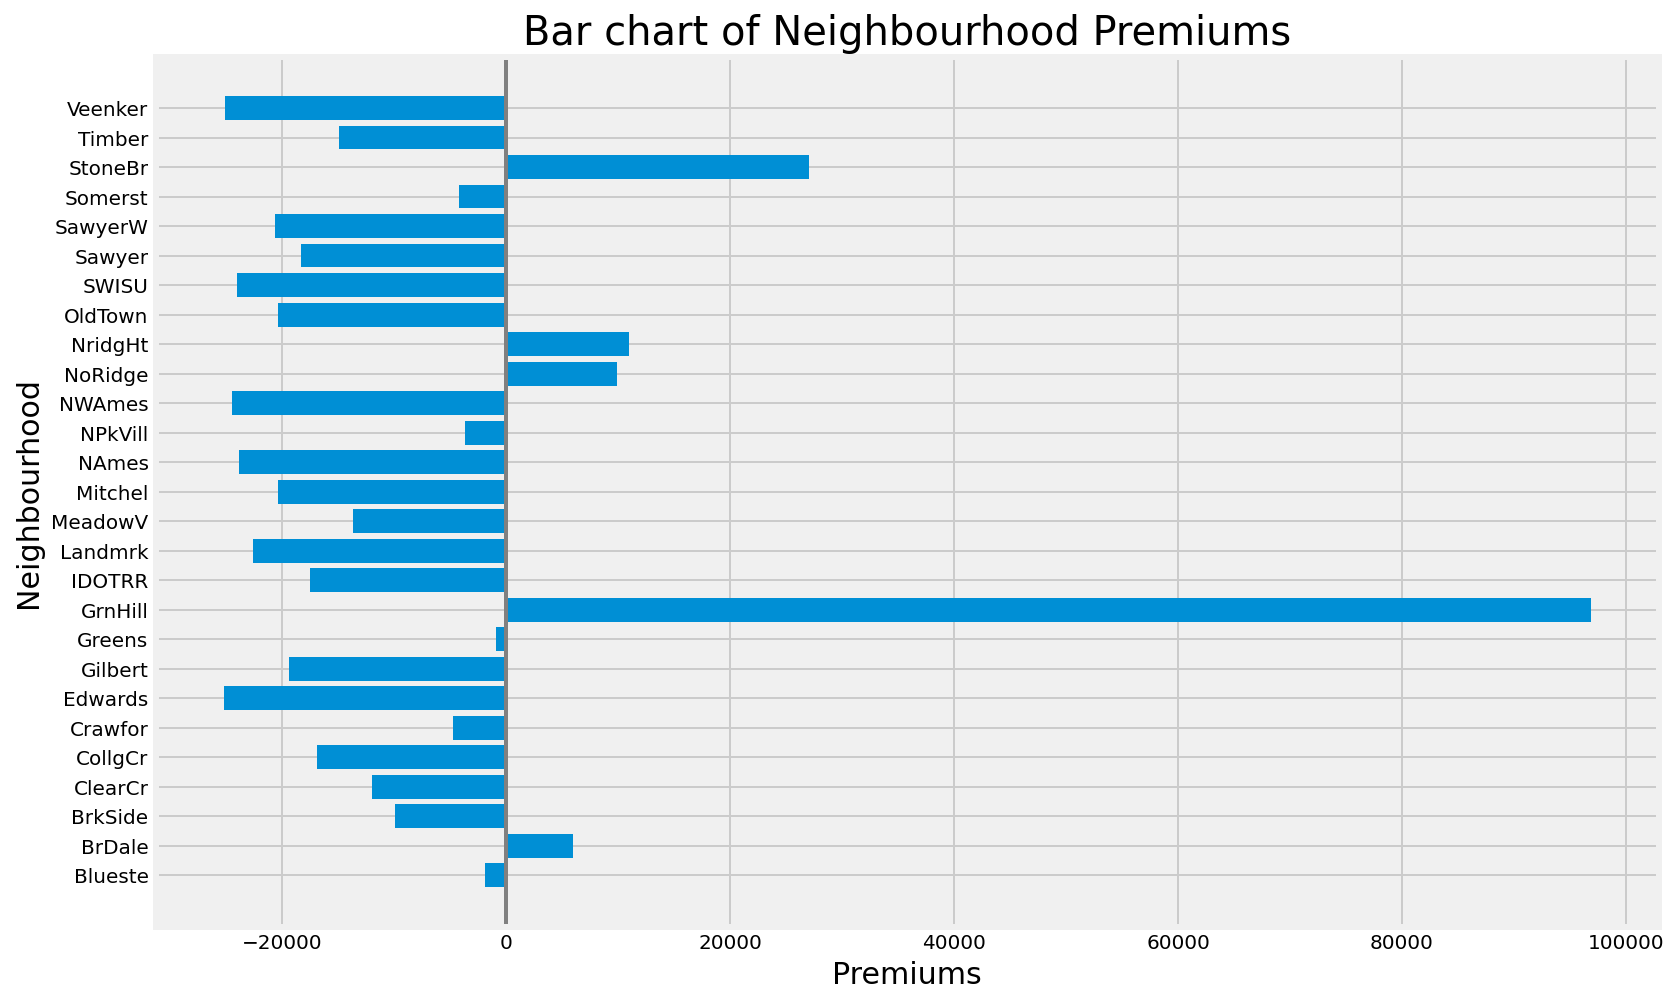

In [169]:
plt.figure(figsize=(12,8))
plt.title("Bar chart of Neighbourhood Premiums", size=20)
plt.xlabel("Premiums", size=15)
plt.ylabel("Neighbourhood", size=15)
plt.axvline(x=0, c='.5', lw=2)

hood_names = [n.split("_")[-1] for n in beta_coeff.loc[hood_dummies].index]

plt.barh(y=hood_names, width=beta_coeff.loc[hood_dummies].Coefficient);
plt.savefig("../assets/scatter_lr_06_hood_premiums.png", transparent=True) # save out figure

As someone new to the region, it would be helpful to know which neighbourhoods are more desirable than others. We can read from the data 3 different subsets. We have the subset of neighbourhoods where you would need to pay a premium for a property in that neighbourhood. We have the subset of neighbourhoods that form the baseline, and lastly, we have the neighbourhoods where you get a discount given a similar property in the premium or baseline neighbourhoods.

Leaving Green Hills premium as an outlier aside, top of the list is Stone Brook where you would need to pay a premium of USD 27,059 for a property in the neighbourhood. This is followed by Northridge Heights with a premium of USD 10,944. As the premiums of the these neighbourhoods are high, we can infer that they must be the more exclusive neighbourhood in the region. On the other end of the spectrum, we have Edwards with the deepest discount of USD 25,206 for a property there. This discount is trailed closely by Veenker with a discount of USD 25,076.

Overall, the difference between neighbourhoods' premiums is an amount of USD 52,265, which in some cases can be equal to the cost of a property. For a modest budget where you do not want your property value to depreciate because of uncontrollable externalities, neighbourhoods around the baseline figure can be well worth the consideration. These include neighbourhoods like Briardale where you pay a slight premium of USD 5,977, or Crawford with a slight discount of USD 4,770, where you can get a reasonably priced property with a great potential for the area to develop and your asset to increase value alongside it.

#### Housing Types

The second feature is the dummy variable of "MS SubClass_150", in which 150 is code for all Planned Unit Developments (PUD) of 1 to 1.5 storeys high and of all ages. The negative coefficient of this feature demonstrates the affordability/undesirability of such housing types, where there is a discount of USD 67,561 in sale prices for such properties. It is conceivable that there are desirable and non-desirable housing types that can impact prices. As such, we can also investigate housing types as ordinal features.

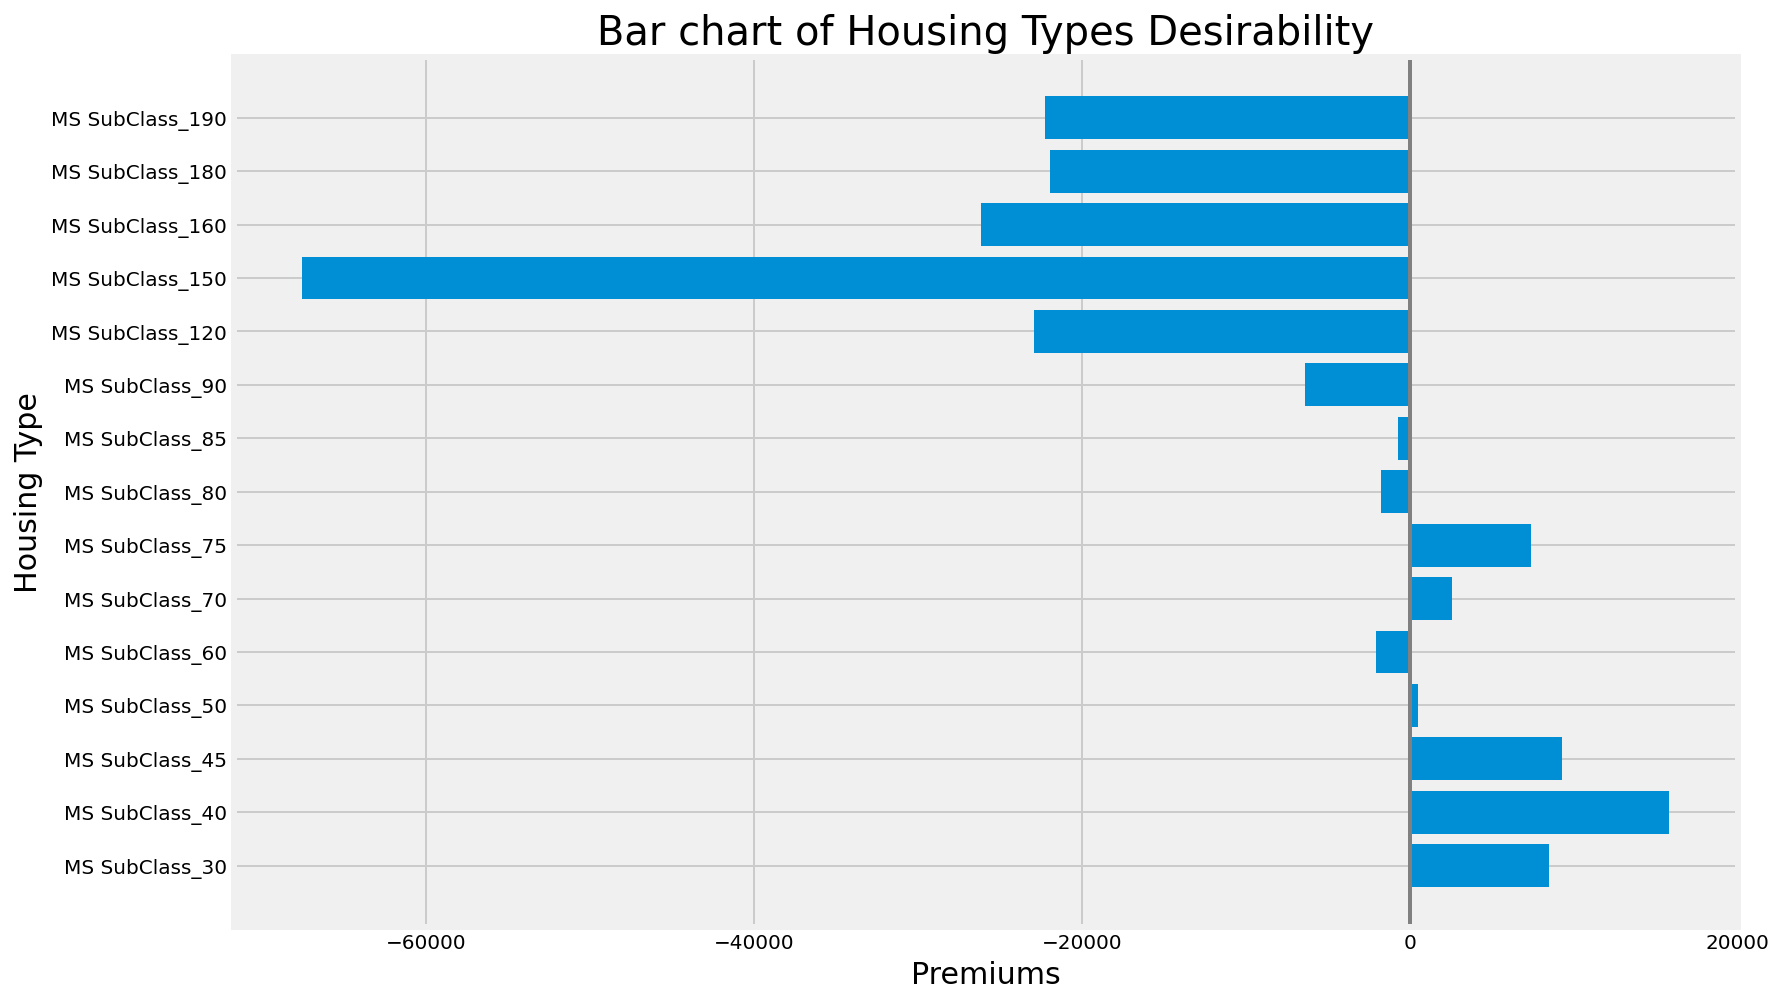

In [170]:
plt.figure(figsize=(12,8))
plt.title("Bar chart of Housing Types Desirability", size=20)
plt.xlabel("Premiums", size=15)
plt.ylabel("Housing Type", size=15)
plt.axvline(x=0, c='.5', lw=2)

plt.barh(y=beta_coeff.loc[subclass_dummies].index, width=beta_coeff.loc[subclass_dummies].Coefficient);
plt.savefig("../assets/scatter_lr_06_housing_types.png", transparent=True) # save out figure

As we can observe, while there subclass 150 has an outlier coefficient, there is a general cluster of low value housing types. From the data documentation, we discover that subclasses 120 to 180 are all different variations of PUDs, which speak to its general perception as affordable and low-value housing. The most expensive type of housing are houses (1 to 1.5 storey, 1945 and older, with attached attics) for subclasses 30 to 45.

#### Types of Sales

The third feature is the dummy variable of "Sale Type_Con" which refers observations of sales made with regular contract and the typical 15% down payment. For sales made with the regular contract, the concluded sales price in our model command a premium of USD 48,178. But what exactly is this premium buying?

The second feature is the dummy variable of "MS SubClass_150", in which 150 is code for all Planned Unit Developments (PUD) of 1 to 1.5 storeys high and of all ages. The negative coefficient of this feature demonstrates the affordability/undesirability of such housing types, where there is a discount of USD 67,561 in sale prices for such properties. It is conceivable that there are desirable and non-desirable housing types that can impact prices. As such, we can also investigate housing types as ordinal features

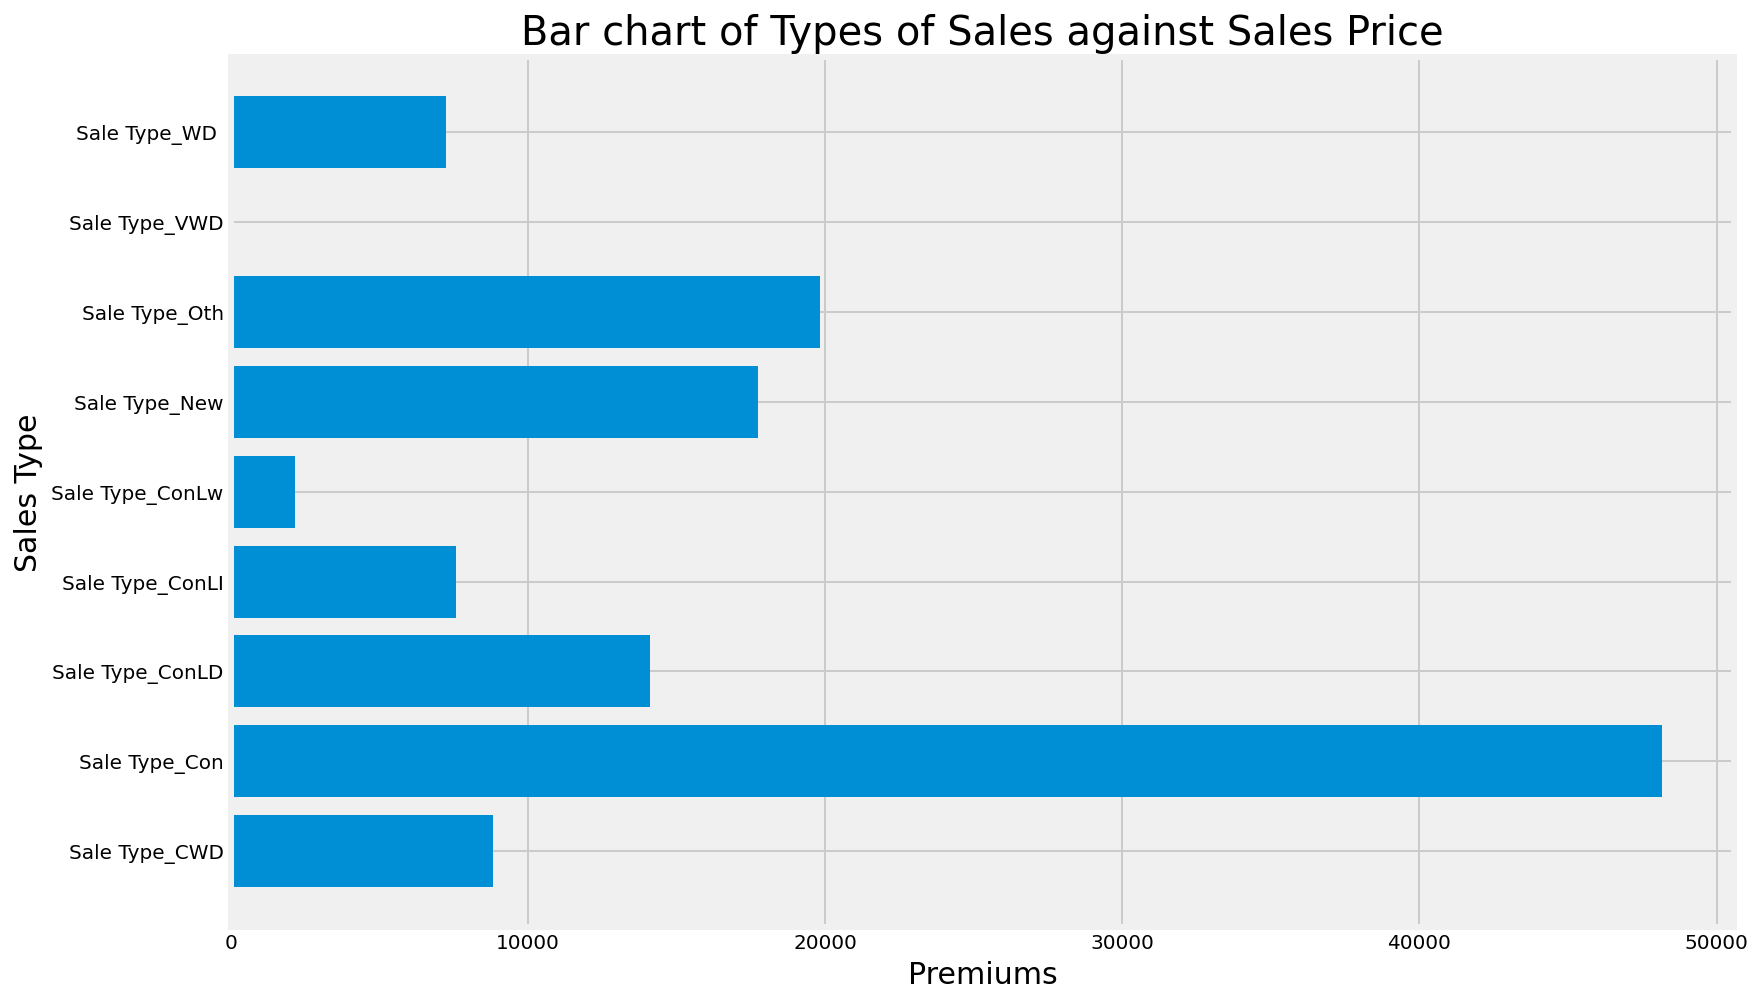

In [171]:
plt.figure(figsize=(12,8))
plt.title("Bar chart of Types of Sales against Sales Price", size=20)
plt.xlabel("Premiums", size=15)
plt.ylabel("Sales Type", size=15)
plt.axvline(x=0, c='.5', lw=2)

plt.barh(y=beta_coeff.loc[sale_dummies].index, width=beta_coeff.loc[sale_dummies].Coefficient);
plt.savefig("../assets/scatter_lr_06_sales_types.png", transparent=True) # save out figure

Unlike the other features/dummy variables, this feature appears to be a meta signal outside of housing physical features. The premiums could be explained in a few ways. It is possible that these regular contracts underwritten by willing buyers speak of their financial health. Buyers with more savings and assets to leverage to purchase these properties will therefore also likely have the negotiating power to pay more and secure their property of choice.

This is in contrast with what appears to be our baseline of "Sale Type_ConLw", which according to our data documentation, observes sale contracts with both low down payments and interests. This type of sales are often made only when seller is unable to find a better willing party, and the buyer is unable to finance mortgage with the usual rates and down payment. For such properties that are unable to draw the demand from buyers with greater purchasing power, they are always going to sell or less. Hence, this feature serves as a reminder for sellers to be self-aware of where their property stands in its general appeal and to price their property accordingly, as well as to keep a look-out for this tell-tale sign of a hard bargain and a discounted selling price should the sellers approach them with the atypical contract offer.